In [ ]:
### My design (Pandas)

In [4]:
import json
import collections
import os
import pandas as pd # just added
from pandas import DataFrame
import numpy as np
from collections import OrderedDict
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib

# makes plots show up in notebook instead of in new window
%matplotlib inline

In [27]:
#A function that returns the Gini index of a dictionary of the form
#{item: frequency}
def getGini(DictIn):
    tags_list = DictIn.keys() 
    #I _think_ this should be equivalent to DictIn.values(), 
    # but doing this just to be safe
    tags_freq_list = [DictIn[tag] for tag in tags_list]


    denominator = 2*len(tags_list) * sum(tags_freq_list)
    numerator = 0
    for freq1 in tags_freq_list:
        for freq2 in tags_freq_list:
            numerator += abs(freq1 - freq2)

    Gini = float(numerator)/denominator
    return Gini

#New
def getUrlGini(DictIn):
    url_list = DictIn.keys    
    url_freq_list = [DictIn[url] for url in url_list]
    denominator = 2*len(url_list) * sum(url_freq_list)
    numerator = 0
    for freq1 in url_freq_list:
        for freq2 in url_freq_list:
            numerator += abs(freq1 - freq2)

    UrlGini = float(numerator)/denominator
    return UrlGini
#New    
    

In [6]:

AtlasList=['Democrat_Atlas.txt'
           #,'Republican_Atlas.txt'
          ]

    
#'domain_URL_hashtag_Democrats_2015-03-06.txt','Domain_URL_hashtag_Democrats_2015-03-07.txt','Domain_URL_hashtag_Democrats_2015-03-08.txt','Domain_URL_hashtag_Democrats_2015-03-09.txt','Domain_URL_hashtag_Democrats_2015-03-10.txt','Domain_URL_hashtag_Democrats_2015-03-11.txt','Domain_URL_hashtag_Democrats_2015-03-12.txt',
#'Domain_URL_hashtag_Democrats_2016-06-23.txt','Domain_URL_hashtag_Democrats_2016-06-24.txt','Domain_URL_hashtag_Democrats_2016-06-25.txt','Domain_URL_hashtag_Democrats_2016-06-26.txt','Domain_URL_hashtag_Democrats_2016-06-27.txt','Domain_URL_hashtag_Democrats_2016-06-28.txt'    
 
#'domain_URL_hashtag_Republicans_2015-03-06.txt','Domain_URL_hashtag_Republicans_2015-03-07.txt','Domain_URL_hashtag_Republicans_2015-03-08.txt','Domain_URL_hashtag_Republicans_2015-03-09.txt','Domain_URL_hashtag_Republicans_2015-03-10.txt','Domain_URL_hashtag_Republicans_2015-03-11.txt','Domain_URL_hashtag_Republicans_2015-03-12.txt',
#'Domain_URL_hashtag_Republicans_2016-06-23.txt','Domain_URL_hashtag_Republicans_2016-06-24.txt','Domain_URL_hashtag_Republicans_2016-06-25.txt','Domain_URL_hashtag_Republicans_2016-06-26.txt','Domain_URL_hashtag_Republicans_2016-06-27.txt','Domain_URL_hashtag_Republicans_2016-06-28.txt' 

           
path_in_Dem ="/Users/julesottino-loffler/Documents/domain_Democrats/"
path_in_Rep ="/Users/julesottino-loffler/Documents/domain_Republicans/"

guiding_path ="/Users/julesottino-loffler/Documents/domain_intro/"

#for filename in os.listdir(os.getcwd()):

#Go over Dems or Republicans
Atlas =  'Democrat_Atlas.txt'
path_in = path_in_Dem
output_name = 'Dem'


#Atlas =  'Republican_Atlas.txt'
#path_in = path_in_Rep
#output_name = 'Rep'

Ads_tags_list=  ['weareperfectday2', 'chongoperu4no', 'limite1gh16', 'sabesquetequierecuando', 'harmonizersaretired', 'nedtsj', 'ad200', 'afazendaabre']


In [30]:
#Ideally, we shouldn't ever need to run this cell in order to run the lower cells

#POINT OF ADVICE: Control+/ to comment or uncomment a line
#                 Tab works on multiple selected lines, and shift+Tab un-tabs things


#Go over Dems or Republicans
Atlas =  'Democrat_Atlas.txt'
path_in = path_in_Dem
output_name = 'Dem'


#Atlas =  'Republican_Atlas.txt'
#path_in = path_in_Rep
#output_name = 'Rep'

total_url_dictionary = {}
total_url_list = []
total_hashtag_count_dictionary = {}
# total_hashtag_count_list = []

date_list = []      #list of starts of weeks
all_tweets = []

    
#Open up a file that describes all the files with the daily data
with open(guiding_path + Atlas,'r') as infile:
    for line in iter(infile): #each line corresponds to one week, so we go week by week
            FileList=line.split(",")


            #an empty dictionary of lists, keys are urls, values are a list of all hashtags
            #{url : [tag1, tag2, etc.]}
            #urls_and_tags = collections.defaultdict(list) 
            
            
            #An empty dictionary where the keys are the urls, and the valuekeep track of 
            #   the tags associated with the url and how many times they are used.  So it looks like
            #   {URL1 : {tag1: how many times it shows up, tag2: how often this shows up, ...}, URL2 :{...}, ...}
            #   So urls_and_tags["http://thehill.com/"] gives a dictionary of the tags associated with 
            #   TheHill.com, with values corresponding to their frequency
            urls_and_tags = {} 
            hashtag_gini_dic = {}
            

            url_dictionary = {} #{Url : number of times it appears}
            url_list=[]         #List of urls
            total_hashtag_count_list=[] # just added list of all hashtags
            
            
            start_of_week = True #used for pulling out first date in week

            #open up each day's specific file
            for xitem in FileList:
                #Some scrubbing on the filename to make it openable
                xitem = xitem.strip()
                xitem = xitem[1:-1]
                
                if start_of_week:
                    #date=xitem[29:-4] #pulling out the date (Dem)
                    date=xitem[31:-4] #pulling out the date (Rep)
                    date_list.append(date)
                    start_of_week = False #we don't need other dates ub weejs
            
                #scrubbing out the wanted information
                with open(path_in +str(xitem),'r') as infile:
                    #each line corresponds to a single tweet
                    for line in iter(infile):
                        #each tweet is written as:
                        # [Dont care] || urls || [Don't care] || hastags seperated by commas
                        split_line=line.split("||")
                        
                        
                        #sanity check
                        if len(split_line) != 5: 
                            print("Line has more or less than 4 items")

                            
                        url = split_line[1] #get url
                        url = url.replace(" ","") #remove trailing whitespace
                        
                        #removing some unneeded surrounding bits
                        if url[:8] ==  'https://':
                            url = url[8:]
                        if url[:7] == 'http://':
                            url = url[7:]
                        if url[:4] == 'www.':
                            url = url[4:]
                        if url[-1] == '/':
                            url = url[:-1]
                        
                        #RECORDING URL FREQUENCY
                        if url in url_list: #if we have seen this url before, we add tally it
                            url_dictionary[url] += 1
                        else:    # if this is the first time we have seen it, we make a new entry
                            url_dictionary[url] = 1
                            url_list.append(url) #we record having seen it
                            urls_and_tags[url] = {} # we set up the second dictionary too
                            
                            
                            
                            
                        #RECORDING TAG FREQUENCY
                        hashtags_list = split_line[3].split(",") #get list of hastags in tweet
                        #adding all the hastags to the urlHash dictionary
                        new_list =[]
                        for tag in hashtags_list: 
                            tag = tag.replace(" ","") #removing whitespace
                            new_list.append(tag)
                            #Just added as attempt to make total hashtag collection 
                            Indiv_hashtag = tag                         
                            if Indiv_hashtag  in total_hashtag_count_list: #just added
                                total_hashtag_count_dictionary[Indiv_hashtag] += 1
                            else:
                                total_hashtag_count_dictionary[Indiv_hashtag] = 1
                                total_hashtag_count_list.append(Indiv_hashtag) #we record having seen it
                                hashtag_gini_dic[Indiv_hashtag] = {}
                            #End of Just added portion
                        
                            
        
                            current_dict = urls_and_tags[url]  #the current recorded frequencies for tags associated with this url!!!
                            if tag in current_dict.keys(): #have we seen this tag before?
                                current_dict[tag] +=  1 # if we have, increment by 1
                                
                            else:
                                current_dict[tag] = 1 #otherwise, make a new entry
                            
                            urls_and_tags[url] = current_dict #update the main dictionary
                            
                            current_url_dict = hashtag_gini_dic[Indiv_hashtag]
                            if Indiv_hashtag in current_url_dict.keys(): 
                                current_url_dict[Indiv_hashtag] +=  1 # if we have, increment by 1
                                
                            else:
                                current_url_dict[Indiv_hashtag] = 1 #otherwise, make a new entry
                            
                            hashtag_gini_dic[Indiv_hashtag] = current_url_dict #update the main dictionary
                            
                        all_tweets.append(new_list)

                            
                        #RECORDING TOTAL URL FREQUENCY (ACROSS ALL WEEKS)
                        if url in total_url_list: #if we have seen this url before, we add tally it
                            total_url_dictionary[url] += 1
                        else:    # if this is the first time we have seen it, we make a new entry
                            total_url_dictionary[url] = 1
                            total_url_list.append(url) #we record having seen it
       
                                

            #At this point, all the information we want is in one of two places:  
            # url_dictionary lists how often each url shows up
            # urls_and_tags contains the tag frequency for each url
            
            #To make other things faster, we record both url_dictionary and
            # urls_and_tags in order to make things faster later
            
            np.save('urlFreq' + output_name + date + '.npy', url_dictionary)
            np.save('HashFreq' + output_name + date + '.npy', total_hashtag_count_dictionary)
            np.save('urlTags' + output_name + date + '.npy', urls_and_tags)
            

            print "week starting in " + date + " complete."
            
            
#when everthing is done, we also save total_url_dictionary            
np.save('urlFreq' + output_name + 'Total' + '.npy', total_url_dictionary)
np.save('date_list' + '.npy', date_list)            
            
print "Compliation complete"
     




week starting in 15-03-06 complete.
week starting in 15-03-13 complete.
week starting in 15-03-20 complete.
week starting in 15-03-27 complete.
week starting in 15-04-03 complete.
week starting in 15-04-10 complete.
week starting in 15-04-17 complete.
week starting in 15-04-24 complete.
week starting in 15-05-01 complete.
week starting in 15-05-08 complete.
week starting in 15-05-15 complete.
week starting in 15-05-22 complete.
week starting in 15-05-29 complete.
week starting in 15-06-05 complete.
week starting in 15-06-12 complete.
week starting in 15-06-19 complete.
week starting in 15-06-26 complete.
week starting in 15-07-03 complete.
week starting in 15-07-10 complete.
week starting in 15-07-17 complete.
week starting in 15-07-24 complete.
week starting in 15-07-31 complete.
week starting in 15-08-07 complete.
week starting in 15-08-14 complete.
week starting in 15-08-21 complete.
week starting in 15-08-28 complete.
week starting in 15-09-04 complete.
week starting in 15-09-11 co

['15-03-06' '15-03-13' '15-03-20' '15-03-27' '15-04-03' '15-04-10'
 '15-04-17' '15-04-24' '15-05-01' '15-05-08' '15-05-15' '15-05-22'
 '15-05-29' '15-06-05' '15-06-12' '15-06-19' '15-06-26' '15-07-03'
 '15-07-10' '15-07-17' '15-07-24' '15-07-31' '15-08-07' '15-08-14'
 '15-08-21' '15-08-28' '15-09-04' '15-09-11' '15-09-18' '15-09-25'
 '15-10-02' '15-10-09' '15-10-16' '15-10-23' '15-10-30' '15-11-06'
 '15-11-13' '15-11-20' '15-11-27' '15-12-04' '15-12-11' '15-12-18'
 '15-12-25' '16-01-01' '16-01-08' '16-01-15' '16-01-22' '16-01-29'
 '16-02-05' '16-02-12' '16-02-19' '16-02-26' '16-03-04' '16-03-11'
 '16-03-18' '16-03-25' '16-04-01' '16-04-08' '16-04-15' '16-04-22'
 '16-04-29' '16-05-06' '16-05-13' '16-05-20' '16-05-27' '16-06-02'
 '16-06-09' '16-06-16' '16-06-23']
['youtube.com', 'huffingtonpost.com', 'politicususa.com', 'washingtonpost.com', 'thehill.com', 'politico.com', 'thedailybeast.com', 'breitbart.com', 'dailykos.com', 'nytimes.com', 'thinkprogress.org', 'change.org', 'empeopled.co

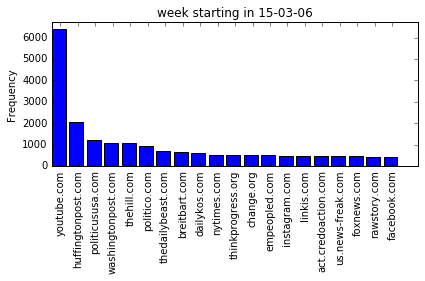

[0.9404240963472001, 0.8266218584306005, 0.8095883152990272, 0.7820278280483647, 0.8320297127561375, 0.7823888467511829, 0.8883069394039371, 0.8118818697623627, 0.7871344892767963, 0.7605107378445937, 0.7422608085591511, 0.8714151216685979, 0.6872697394577115, 0.5367564621011204, 0.7023002440619567, 0.8371827773025378, 0.9059071010290523, 0.7865013684559526, 0.7744158081185609, 0.597932632329353]


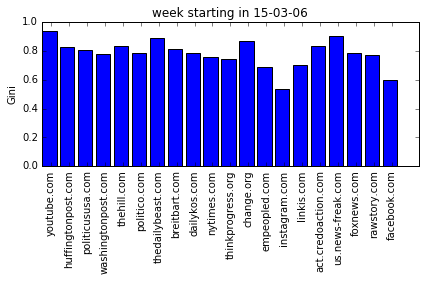

['youtube.com', 'huffingtonpost.com', 'vimeo.com', 'liveleak.com', 'cms.fightforthefuture.org', 'thehill.com', 'politicususa.com', 'washingtonpost.com', 'facebook.com', 'act.credoaction.com', 'change.org', 'thinkprogress.org', 'politico.com', 'glaad.org', 'dailykos.com', 'linkis.com', 'cnn.com', 'instagram.com', 'nytimes.com', 'breitbart.com']
[4337, 2178, 2006, 1950, 1545, 1455, 1065, 951, 714, 702, 612, 584, 576, 550, 511, 492, 408, 398, 391, 388]
['p2', 'tcot', 'sion', 'uniteblue', 'tntweeters', 'lgbt', 'edl', 'sioa', 'islamophobia', 'islam', 'realtime', 'adl', 'istandwithmariam', 'blacklivesmatter', 'tpp', 'uslatino', 'news', 'isis', 'terrorism', 'jihad']
[16633, 12745, 8481, 7835, 6360, 6214, 6196, 4501, 4318, 4175, 4012, 3955, 3932, 3624, 3516, 3080, 2748, 2436, 2427, 2265]


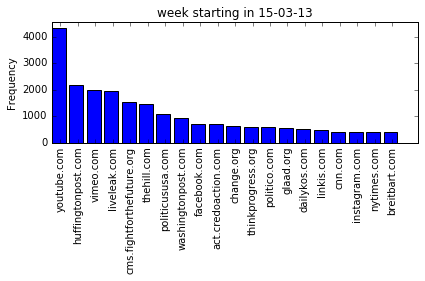

[0.9287895288617707, 0.8513875775274468, 0.5995022557136483, 0.7316810068062155, 0.6615219721329046, 0.8566814604984065, 0.8206617544482632, 0.782750948033779, 0.6871097615067044, 0.8729452529452529, 0.8667883211678832, 0.6736786047130875, 0.725297936677339, 0.803766352803933, 0.7775109782304027, 0.7115108265874147, 0.7705745341614907, 0.505852797803256, 0.6933978568959558, 0.7945359725020742]


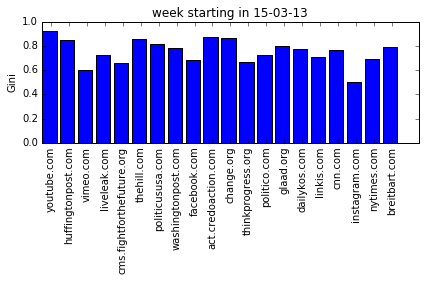

['youtube.com', 'huffingtonpost.com', 'cms.fightforthefuture.org', 'thehill.com', 'politicususa.com', 'facebook.com', 'cnn.com', 'politico.com', 'thinkprogress.org', 'change.org', 'nytimes.com', 'washingtonpost.com', 'linkis.com', 'dailykos.com', 'act.credoaction.com', 'twitter.com', 'breitbart.com', 'thehilltalk.com', 'rawstory.com', 'votolatino.org']
[7740, 2287, 1680, 1286, 1116, 817, 744, 738, 735, 680, 666, 627, 552, 477, 462, 453, 408, 388, 370, 363]
['p2', 'tcot', 'tntweeters', 'uniteblue', 'lgbt', 'islamophobia', 'islam', 'sioa', 'sion', 'tpp', 'edl', 'infidellivesmatter', 'realtime', 'pjnet', 'uslatino', 'blacklivesmatter', 'obama', 'gunsense', 'news', 'isis']
[13880, 12829, 8488, 7494, 6348, 6294, 6039, 5944, 5942, 4872, 4019, 3978, 3978, 3734, 3517, 3185, 2995, 2668, 2438, 2157]


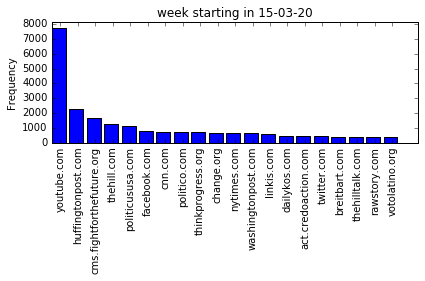

[0.9582685372139496, 0.84890728723801, 0.5750829562594268, 0.8167309236816407, 0.8050747558551551, 0.7057848963206909, 0.8021157129722867, 0.7913284524377951, 0.7286266245170355, 0.8833446481104322, 0.7285675640708985, 0.7715332286760859, 0.7130831524656351, 0.761623345020411, 0.8627299295169332, 0.7174306239288188, 0.7604615548986787, 0.1762218045112782, 0.7414814814814815, 0.5874747474747475]


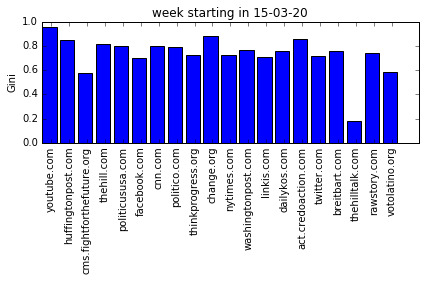

['huffingtonpost.com', 'youtube.com', 'uscis.gov', 'thehill.com', 'politicususa.com', 'dailykos.com', 'nytimes.com', 'facebook.com', 'act.credoaction.com', 'thinkprogress.org', 'washingtonpost.com', 'blogtalkradio.com', 'thenewcivilrightsmovement.com', 'linkis.com', 'rawstory.com', 'change.org', 'michaeljbernard.skyeyegroup.com', 'theweek.com', 'immigrationpolicy.org', 'politico.com']
[3301, 2261, 1094, 1057, 766, 739, 651, 641, 624, 617, 613, 590, 582, 566, 537, 535, 492, 485, 438, 406]
['lgbt', 'p2', 'tntweeters', 'uniteblue', 'tcot', 'edl', 'realtime', 'tpp', 'gunsense', 'uslatino', 'blacklivesmatter', 'rfra', 'boycottindiana', 'infidelivesmatter', 'pjnet', 'cair', 'thisisislam', 'gop', 'indiana', 'wiunion']
[12704, 9477, 7669, 6930, 5874, 4019, 3978, 3894, 3274, 3083, 2407, 2219, 2147, 2022, 2014, 1968, 1964, 1764, 1692, 1533]


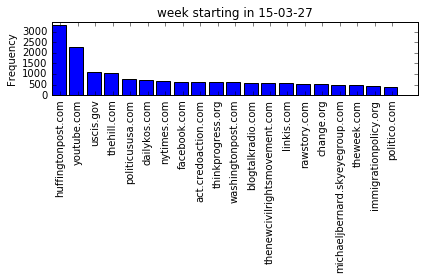

[0.863845238906151, 0.7564588329175854, 0.7847574116139554, 0.8094243083311509, 0.8044869293796333, 0.7768867924528302, 0.7689551574496495, 0.6583684902727723, 0.8159564393939394, 0.7522700284278329, 0.7343635968800174, 0.8584561834561835, 0.8340544871794872, 0.7103973407544836, 0.782907267179396, 0.8680296157950907, 0.6569443360967895, 0.8475103474225512, 0.6003146476774033, 0.729254571026723]


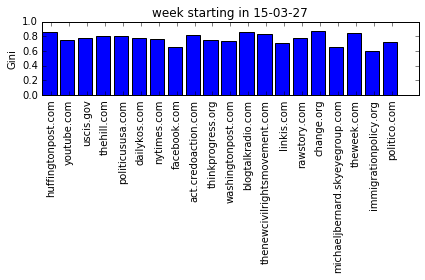

['huffingtonpost.com', 'youtube.com', 'twitter.com', 'thehill.com', 'act.credoaction.com', 'politicususa.com', 'washingtonpost.com', 'gofundme.com', 'dailykos.com', 'nytimes.com', 'facebook.com', 'instagram.com', 'thinkprogress.org', 'michaeljbernard.skyeyegroup.com', 'linkis.com', 'advocate.com', 'rawstory.com', 'politico.com', 'uscis.gov', 'vote411.org']
[2059, 1853, 995, 861, 823, 802, 694, 678, 671, 637, 604, 600, 579, 522, 518, 479, 419, 401, 298, 295]
['p2', 'lgbt', 'uniteblue', 'tcot', 'blacklivesmatter', 'tntweeters', 'gunsense', 'uslatino', 'tpp', 'infidelivesmatter', 'pjnet', 'cair', 'thisisislam', 'wiunion', 'libcrib', 'gop', 'stoprush', 'teaparty', 'walterscott', '1u']
[9169, 7892, 6203, 5334, 5026, 4601, 3344, 3243, 2107, 2022, 2012, 1968, 1964, 1492, 1289, 1260, 1229, 1210, 1134, 1028]


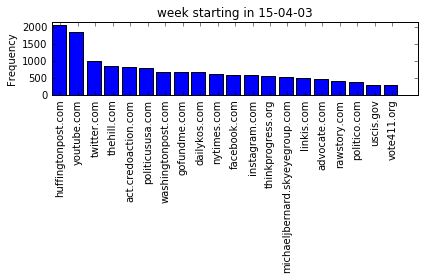

[0.8366455775590325, 0.7592997756501406, 0.7070843969276909, 0.7563785581317611, 0.8009483516258916, 0.8376430796088, 0.7734132078162886, 0.8782156635137361, 0.7751508498681358, 0.7270484553330705, 0.655051223383423, 0.5341585946849104, 0.7504591126551333, 0.6857167191891662, 0.6883878679217093, 0.7925368978000557, 0.7273718276273208, 0.7357517091559644, 0.7412234042553192, 0.489686291362269]


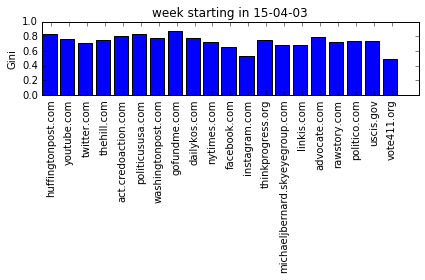

['youtube.com', 'twitter.com', 'libertarianrepublican.net', 'huffingtonpost.com', 'faithfreedom.org', 'hillaryclinton.com', 'instagram.com', 'jkmesh.com', 'politicususa.com', 'washingtonpost.com', 'thehill.com', 'breitbart.com', 'facebook.com', 'cnn.com', 'thinkprogress.org', 'nytimes.com', 'linkis.com', 'politico.com', 'amazon.com', 'indiegogo.com']
[4479, 3075, 1768, 1756, 1504, 1345, 982, 973, 830, 767, 708, 689, 547, 535, 515, 500, 484, 477, 420, 413]
['p2', 'hillary2016', 'tcot', 'hillaryclinton', 'lgbt', 'uniteblue', 'blacklivesmatter', 'pjnet', 'tntweeters', 'uslatino', 'homophobia', 'tpp', 'gunsense', 'gop', 'hillary', 'ainf', 'infidelivesmatter', 'thisisislam', 'libertarian', 'marriageequality']
[10880, 8381, 8212, 6335, 6132, 6053, 4975, 4728, 4429, 4004, 3349, 3196, 3110, 2983, 2977, 2259, 2022, 1964, 1790, 1657]


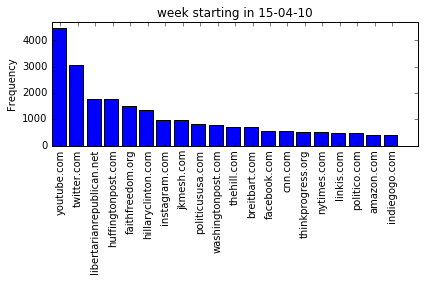

[0.8372273494835573, 0.7957438453357545, 0.0, 0.8356816240759604, 0.0, 0.8929515751303165, 0.5945562859490551, 0.0, 0.8222074343887177, 0.7690255303847536, 0.7426574434356535, 0.801756882114025, 0.6085132938581215, 0.7338267040598628, 0.727944055944056, 0.7020355603610098, 0.6633471645919778, 0.7083301412191323, 0.7618630527268178, 0.6624288039056143]


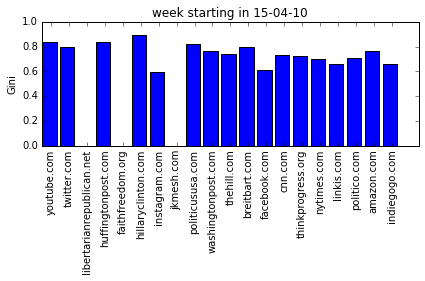

['youtube.com', 'twitter.com', 'battleforthenet.com', 'huffingtonpost.com', 'politicususa.com', 'thehill.com', 'act.credoaction.com', 'instagram.com', 'breitbart.com', 'washingtonpost.com', 'nytimes.com', 'politico.com', 'facebook.com', 'dailykos.com', 'linkis.com', 'stopfasttrack.com', 'salon.com', 'ConservativeReport.Org', 'amazon.com', 'thinkprogress.org']
[4350, 2502, 1580, 1264, 835, 819, 597, 545, 517, 502, 478, 463, 454, 438, 406, 405, 381, 373, 366, 361]
['p2', 'tpp', 'uniteblue', 'tcot', 'lgbt', 'tntweeters', 'blacklivesmatter', 'gunsense', 'hillary2016', 'uslatino', 'ainf', 'infidelivesmatter', 'thisisislam', 'fasttrack', 'islamophobia', 'nofasttrack', 'hillaryclinton', 'wiunion', 'cpac', 'pjnet']
[8885, 6442, 6279, 6247, 5552, 3862, 3656, 3220, 3176, 3137, 2531, 2022, 1964, 1820, 1746, 1713, 1707, 1656, 1504, 1323]


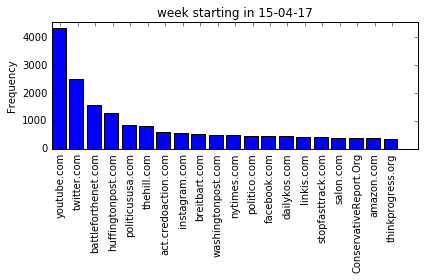

[0.9004397375018116, 0.7422767619396833, 0.8156138790035588, 0.8157814407814408, 0.8058530764762218, 0.8041540576093817, 0.8578709288299156, 0.5447871401412276, 0.750080666721981, 0.7336936437546193, 0.7254595737758256, 0.7173045955654651, 0.6629178928781636, 0.7236855810293148, 0.6788864320373441, 0.7648882480173035, 0.7186751428044961, 0.8009542372568219, 0.7948492777518907, 0.6805157022158457]


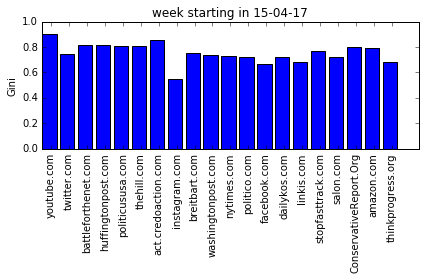

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'battleforthenet.com', 'instagram.com', 'thehilltalk.com', 'facebook.com', 'politicususa.com', 'act.credoaction.com', 'washingtonpost.com', 'thehill.com', 'breitbart.com', 'hillaryclinton.com', 'linkis.com', 'dailykos.com', 'nytimes.com', 'amazon.com', 'politico.com', 'salon.com', 'ConservativeReport.Org']
[3848, 2705, 1714, 1633, 1411, 1194, 883, 852, 843, 801, 780, 522, 480, 464, 461, 440, 382, 359, 342, 325]
['blacklivesmatter', 'p2', 'lgbt', 'tpp', 'uniteblue', 'tcot', 'tntweeters', 'uslatino', 'gunsense', 'hillary2016', 'ainf', 'fasttrack', 'freddiegray', 'infidelivesmatter', 'wiunion', 'baltimore', 'gop', 'stoprush', 'pjnet', 'obama']
[8836, 8723, 7463, 7317, 6402, 5369, 3840, 2899, 2817, 2481, 2375, 2093, 2083, 2022, 1841, 1610, 1436, 1394, 1386, 1370]


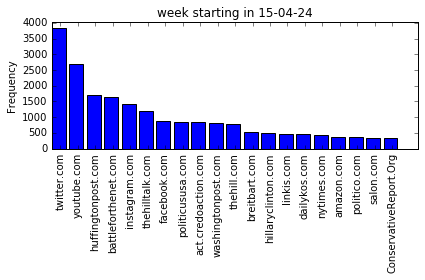

[0.7665670804398537, 0.776589250709331, 0.8183169101241483, 0.6637444888752179, 0.6587403522669204, 0.8826854149434794, 0.731080223819903, 0.8066917958025036, 0.892516507703595, 0.768910322402005, 0.7794650404540514, 0.7432801769563052, 0.8723333333333333, 0.68517832097776, 0.7337162067516458, 0.7084099136730716, 0.755416170038346, 0.7133927671280227, 0.7496286924473293, 0.7557781157300058]


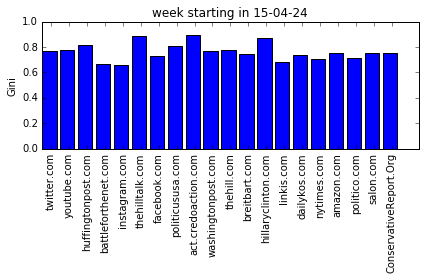

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'washingtonpost.com', 'politicususa.com', 'thehill.com', 'instagram.com', 'getonfleek.com', 'act.credoaction.com', 'nytimes.com', 'out.com', 'facebook.com', 'politico.com', 'linkis.com', 'dailykos.com', 'thinkprogress.org', 'shouldbelegal.com', 'amazon.com', 'endcitizensunited.org', 'hillaryclinton.com']
[3749, 3173, 1893, 1657, 1433, 1127, 1069, 1016, 844, 702, 678, 670, 654, 633, 598, 513, 463, 461, 427, 418]
['p2', 'blacklivesmatter', 'uniteblue', 'tntweeters', 'lgbt', 'ainf', 'tcot', 'tpp', 'gunsense', 'uslatino', 'wiunion', 'infidelivesmatter', 'pjnet', 'hillary2016', 'stoprush', '1u', 'gop', 'nofasttrack', 'libcrib', 'baltimore']
[11402, 10007, 8238, 7594, 7532, 5964, 5563, 4671, 3634, 3294, 2128, 2022, 1693, 1663, 1637, 1634, 1602, 1567, 1501, 1464]


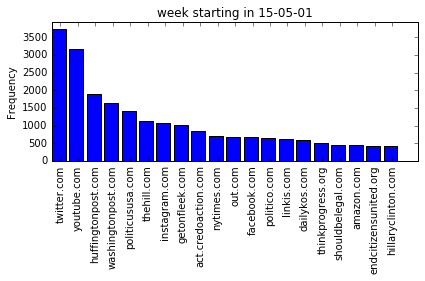

[0.7628530521931537, 0.7900429108579147, 0.8424768154737954, 0.8401996658509037, 0.8418151307266262, 0.8073134851138354, 0.6118353239794294, 0.0, 0.879950495049505, 0.7377424858545153, 0.8793183940242764, 0.6216816896429834, 0.818400755792343, 0.7312075911789653, 0.7345181444433654, 0.7384785565154098, 0.3994236311239193, 0.7657463956417934, 0.0005212405525149857, 0.8665008291873963]


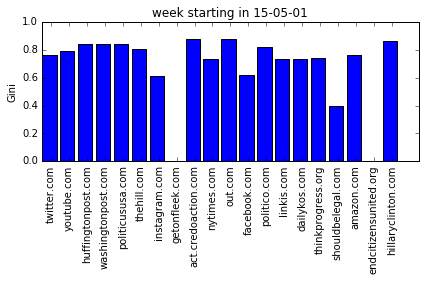

['twitter.com', 'youtube.com', 'thehill.com', 'battleforthenet.com', 'huffingtonpost.com', 'getonfleek.com', 'washingtonpost.com', 'politicususa.com', 'lgbt.jobthread.com', 'act.credoaction.com', 'dailykos.com', 'nytimes.com', 'facebook.com', 'linkis.com', 'instagram.com', 'today.yougov.com', 'salon.com', 'teespring.com', 'politico.com', 'thinkprogress.org']
[3372, 2883, 2412, 1667, 1356, 1198, 1107, 876, 861, 808, 698, 680, 678, 617, 586, 554, 534, 517, 464, 457]
['tpp', 'p2', 'uniteblue', 'tntweeters', 'lgbt', 'blacklivesmatter', 'ainf', 'tcot', 'fasttrack', 'gunsense', 'uslatino', 'libcrib', 'nofasttrack', 'infidelivesmatter', 'wiunion', 'latism', 'gop', 'stoprush', 'hillary2016', 'pjnet']
[10055, 9496, 8029, 7366, 6819, 6126, 5329, 4422, 3763, 3209, 2421, 2132, 2032, 2022, 2010, 1628, 1385, 1281, 1258, 1199]


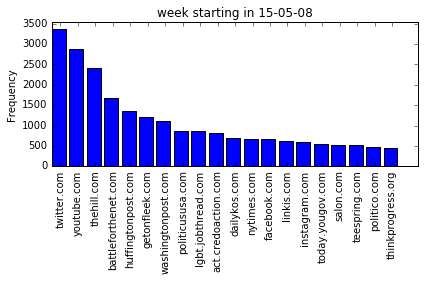

[0.7666337432020685, 0.7727436414117774, 0.8879535760423514, 0.8353697749196142, 0.8243908214597183, 0.0, 0.7894119535126316, 0.7697466467958272, 0.0, 0.8631394311463263, 0.7941774919408893, 0.7736812610010024, 0.6534198829035227, 0.7467414787624541, 0.6224366288010318, 0.0, 0.780086608780186, 0.7976461038961039, 0.7475703084651861, 0.7169578221856171]


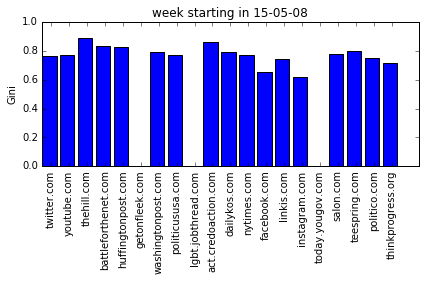

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'politicususa.com', 'thehill.com', 'washingtonpost.com', 'linkis.com', 'nytimes.com', 'ifyouonlynews.com', 'instagram.com', 'hillaryclinton.com', 'crooksandliars.com', 'salon.com', 'politico.com', 'dailykos.com', 'patdollard.com', 'facebook.com', 'act.credoaction.com', 'infowars.com', 'citizen.org']
[899, 380, 209, 186, 164, 157, 130, 128, 109, 103, 99, 91, 91, 84, 84, 83, 77, 74, 71, 68]
['infidelivesmatter', 'p2', 'lgbt', 'tntweeters', 'uniteblue', 'tpp', 'blacklivesmatter', 'ainf', 'tcot', 'gunsense', 'qarlive', 'boycottangieslist', 'uslatino', 'nofasttrack', 'gop', 'wiunion', 'sion', 'sioa', 'vota', 'libcrib']
[2022, 1613, 1300, 1245, 1242, 1136, 1025, 911, 826, 606, 566, 565, 486, 404, 383, 362, 351, 351, 304, 296]


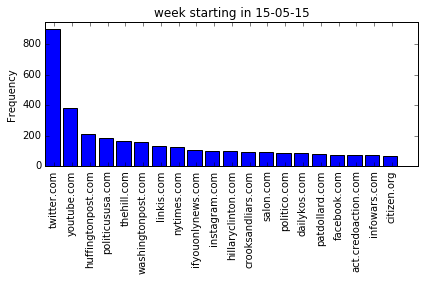

[0.7625526266937727, 0.575589573203462, 0.6595271742330566, 0.6612740141557129, 0.6576980568011959, 0.5737687592475164, 0.5125700439194305, 0.6265866805772909, 0.7031963470319634, 0.3796404867256637, 0.4801980198019802, 0.5776470588235294, 0.5709186840471757, 0.6209353306540007, 0.5936663693131133, 0.6594982078853047, 0.4320261437908497, 0.6829268292682927, 0.6520763187429854, 0.5927197802197802]


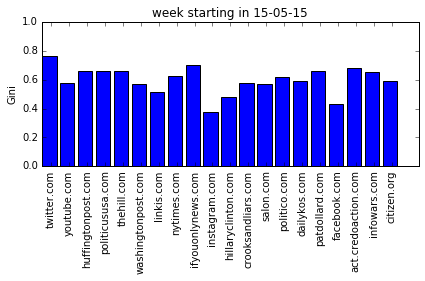

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'politicususa.com', 'washingtonpost.com', 'salon.com', 'nytimes.com', 'act.credoaction.com', 'instagram.com', 'thehilltalk.com', 'facebook.com', 'rawstory.com', 'thehill.com', 'dailykos.com', 'linkis.com', 'breitbart.com', 'crooksandliars.com', 'maria-johnsen.com', 'amazon.com', 'thinkprogress.org']
[1221, 686, 344, 273, 229, 186, 180, 179, 164, 156, 148, 145, 141, 134, 121, 113, 106, 104, 104, 103]
['p2', 'infidelivesmatter', 'uniteblue', 'lgbt', 'tpp', 'tcot', 'tntweeters', 'blacklivesmatter', 'ainf', 'gunsense', 'uslatino', 'stoprush', 'qarlive', 'boycottangieslist', 'bernie2016', 'wiunion', 'nofasttrack', 'feelthebern', 'hillary2016', 'hillaryclinton']
[2355, 2022, 1965, 1874, 1520, 1334, 1278, 1217, 1024, 973, 651, 569, 566, 565, 494, 451, 408, 396, 384, 376]


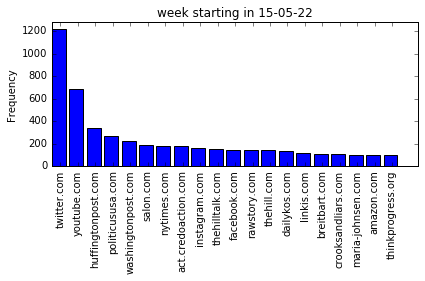

[0.6965443108809758, 0.6320093351720794, 0.6951546497487217, 0.7102405126498003, 0.6635138571065344, 0.6965877820583379, 0.5796509081809271, 0.7188304093567252, 0.4361643330876934, 0.7545386120728587, 0.4849916704528245, 0.6307252542710895, 0.600480413895048, 0.5796760710553814, 0.567883122440247, 0.612566920259228, 0.5405539479123604, 0.0, 0.6568696883852692, 0.5402495718130658]


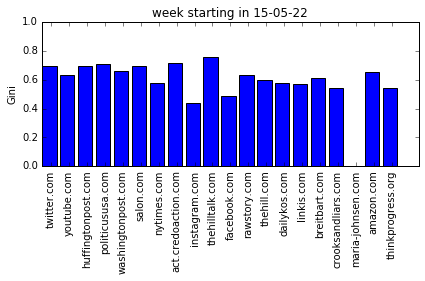

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'politicususa.com', 'act.credoaction.com', 'washingtonpost.com', 'nytimes.com', 'facebook.com', 'wikileaks.org', 'google.com', 'linkis.com', 'salon.com', 'instagram.com', 'politico.com', 'dailykos.com', 'thehill.com', 'alternet.org', 'vine.co', 'thehilltalk.com', 'StopFastTrackNow.org']
[4852, 2846, 1529, 1160, 968, 903, 781, 759, 758, 706, 655, 637, 603, 589, 587, 575, 546, 536, 524, 505]
['p2', 'uniteblue', 'lgbt', 'tpp', 'tcot', 'ainf', 'tntweeters', 'gunsense', 'blacklivesmatter', 'nofasttrack', 'wiunion', 'uslatino', 'stoprush', 'infidelivesmatter', 'hillary2016', 'tntvote', '1u', 'libcrib', 'bernie2016', 'feelthebern']
[10472, 9041, 8220, 8085, 5683, 4488, 4322, 4201, 4145, 2858, 2344, 2251, 2031, 2022, 1734, 1715, 1689, 1538, 1514, 1469]


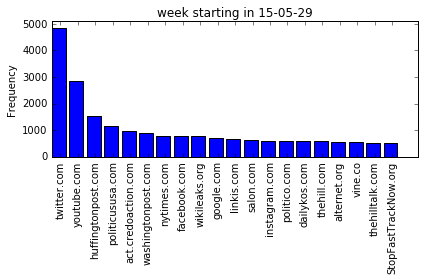

[0.794669315076411, 0.7780679629802748, 0.8010676554709799, 0.8240239349207527, 0.870710411247025, 0.7833748977449236, 0.7489389233954451, 0.6677829722197249, 0.8371645129224652, 0.7595350830053303, 0.730664895255815, 0.7601140526225, 0.5594276150534401, 0.7286141575274178, 0.7846913474692202, 0.7467943253109494, 0.738739918895521, 0.8125292602996255, 0.823017399551494, 0.7759127773981759]


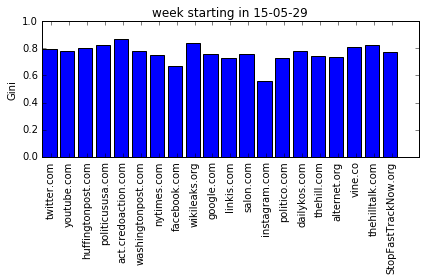

['twitter.com', 'youtube.com', 'readthetpp.com', 'battleforthenet.com', 'huffingtonpost.com', 'breitbart.com', 'wikileaks.org', 'politicususa.com', 'washingtonpost.com', 'thehill.com', 'facebook.com', 'StopFastTrackNow.org', 'salon.com', 'instagram.com', 'google.com', 'dailykos.com', 'linkis.com', 'politico.com', 'nytimes.com', 'amazon.com']
[6104, 3324, 2241, 1925, 1922, 988, 952, 926, 919, 809, 781, 748, 724, 710, 686, 649, 640, 616, 584, 556]
['tpp', 'p2', 'uniteblue', 'lgbt', 'blacklivesmatter', 'tcot', 'gunsense', 'ainf', 'nofasttrack', 'tntweeters', 'tntvote', 'uslatino', 'bernie2016', 'stoprush', 'wiunion', 'infidelivesmatter', 'feelthebern', '1u', 'hillary2016', 'pjnet']
[14629, 10062, 9717, 8873, 6688, 6037, 4377, 3762, 3393, 2834, 2801, 2416, 2386, 2080, 2033, 2022, 1950, 1759, 1735, 1470]


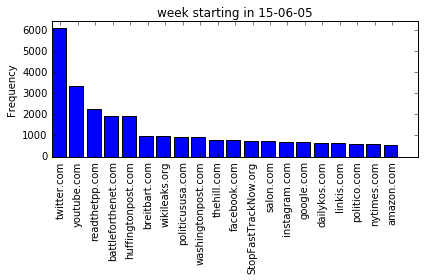

[0.8065703519274401, 0.7789600712810534, 0.9320468431771894, 0.8785072668550666, 0.8122549625236801, 0.7906938284383122, 0.8846496335365436, 0.84062893081761, 0.7903745831430666, 0.7605134941882701, 0.6691474068988987, 0.8306763904667669, 0.7789473684210526, 0.5469666225140678, 0.7671654929577465, 0.7386417235975229, 0.7006537095578191, 0.7547190457952618, 0.6923026545581558, 0.7975069715560513]


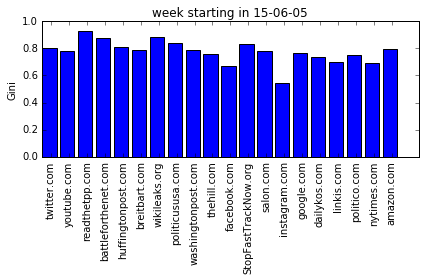

['twitter.com', 'youtube.com', 'hillaryclinton.com', 'huffingtonpost.com', 'StopFastTrackNow.org', 'politicususa.com', 'washingtonpost.com', 'breitbart.com', 'facebook.com', 'stopfasttrack.com', 'nytimes.com', 'instagram.com', 'salon.com', 'thehill.com', 'dailykos.com', 'thehilltalk.com', 'act.credoaction.com', 'thinkprogress.org', 'google.com', 'linkis.com']
[8061, 3247, 1806, 1650, 1144, 1071, 1020, 1016, 964, 939, 911, 847, 839, 759, 740, 629, 606, 599, 565, 538]
['tpp', 'p2', 'uniteblue', 'lgbt', 'tcot', 'hillary2016', 'blacklivesmatter', 'gunsense', 'nofasttrack', 'ainf', 'feelthebern', 'tntvote', 'hillaryclinton', 'bernie2016', 'stoprush', 'tntweeters', '1u', 'infidelivesmatter', 'uslatino', 'hillary']
[12212, 10035, 9279, 7735, 6063, 5799, 5319, 4535, 4254, 3408, 3173, 2705, 2402, 2254, 2240, 2218, 2117, 2022, 2011, 1651]


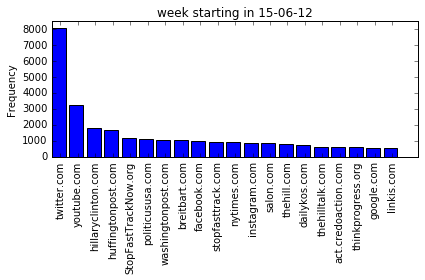

[0.8296928434197209, 0.7901826132349649, 0.9493638933764136, 0.7906660591131317, 0.791452168438206, 0.8083197319817885, 0.7406553045029076, 0.7919284218541786, 0.6760365627006386, 0.7613132209405501, 0.7433057557156837, 0.5544389064079462, 0.7799347303653417, 0.7887643692516055, 0.7551324458787145, 0.813893159865957, 0.8635122556624263, 0.7080245398773006, 0.7352387219751293, 0.690238847216739]


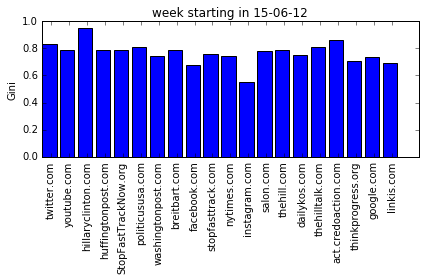

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'politicususa.com', 'facebook.com', 'washingtonpost.com', 'thehilltalk.com', 'act.credoaction.com', 'action.citizen.org', 'breitbart.com', 'rt.com', 'instagram.com', 'salon.com', 'nytimes.com', 'thehill.com', 'vine.co', 'alternet.org', 'dailykos.com', 'linkis.com', 'thinkprogress.org']
[7752, 3684, 1846, 1256, 1173, 1098, 1057, 955, 925, 917, 809, 785, 780, 741, 725, 704, 643, 627, 608, 602]
['p2', 'uniteblue', 'blacklivesmatter', 'tpp', 'lgbt', 'tcot', 'ainf', 'stoprush', 'tntvote', 'feelthebern', 'gunsense', 'charlestonshooting', 'nofasttrack', 'bernie2016', 'tntweeters', 'pjnet', 'uslatino', 'infidelivesmatter', 'hillaryclinton', 'hillary2016']
[11523, 10710, 9005, 8539, 8446, 6204, 4320, 4092, 3862, 3633, 3598, 3054, 2587, 2584, 2370, 2315, 2057, 2022, 1792, 1783]


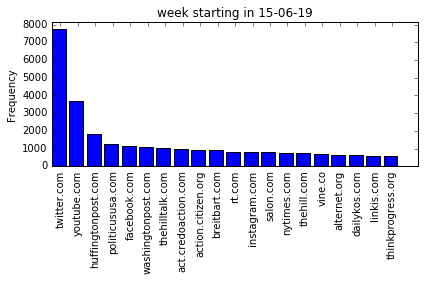

[0.8233634664015078, 0.82533258475206, 0.8179041869959538, 0.8175438784017787, 0.7457754878167046, 0.7564923359811512, 0.8714312641367178, 0.767615117018491, 0.7958038661008958, 0.7941975920808364, 0.9055770894500569, 0.5458195811215721, 0.8038659026816629, 0.7347768217355424, 0.7430378361709218, 0.8063719708763819, 0.7066517746339042, 0.7411139975550122, 0.710159302255191, 0.7126302729528536]


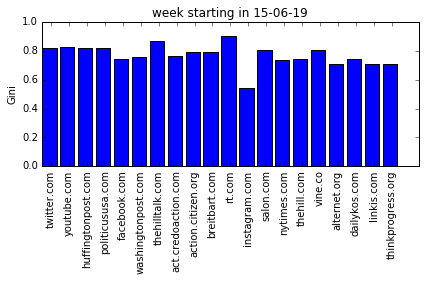

['twitter.com', 'youtube.com', 'instagram.com', 'politicususa.com', 'vine.co', 'thehilltalk.com', 'huffingtonpost.com', 'facebook.com', 'm.SoundCloud.com', 'marijuanastocks.com', 'advocate.com', 'politico.com', 'salon.com', 'washingtonpost.com', 'act.credoaction.com', 'google.com', 'cnn.com', 'nytimes.com', 'alternet.org', 'linkis.com']
[9549, 3540, 2098, 1262, 1158, 1154, 1146, 1095, 1095, 1046, 998, 845, 772, 695, 684, 670, 613, 601, 536, 518]
['lgbt', 'p2', 'uniteblue', 'blacklivesmatter', 'tcot', 'feelthebern', 'tpp', 'lovewins', 'stoprush', 'bernie2016', 'ainf', 'tntvote', 'gunsense', 'uslatino', 'hillary2016', 'pjnet', 'tntweeters', 'infidelivesmatter', 'marriageequality', 'scotus']
[18967, 10824, 9972, 7306, 6324, 4965, 4943, 4778, 4412, 3413, 3326, 2893, 2457, 2354, 2311, 2279, 2175, 2022, 1927, 1912]


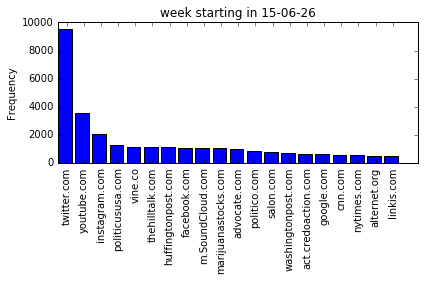

[0.8577595772150842, 0.7828542675561737, 0.7123646290667567, 0.8141112096696627, 0.8245235093105275, 0.8750544109112014, 0.7782066928087424, 0.7051735775973554, 0.15251000363768644, 0.6630123927550048, 0.8739258458025359, 0.7623482726423902, 0.7813147562438651, 0.7354922600125244, 0.8540740740740741, 0.7479573823249129, 0.7219884602786666, 0.7290130295791065, 0.7313405408716426, 0.7052403378933991]


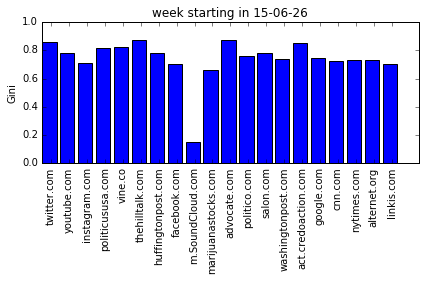

['twitter.com', 'youtube.com', 'salon.com', 'google.com', 'huffingtonpost.com', 'politicususa.com', 'breitbart.com', 'washingtonpost.com', 'facebook.com', 'act.credoaction.com', 'nowth.is', 'alternet.org', 'politico.com', 'linkis.com', 'instagram.com', 'thinkprogress.org', 'rawstory.com', 'nytimes.com', 'dailykos.com', 'amazon.com']
[7983, 3513, 1128, 1121, 1088, 1043, 1023, 874, 728, 669, 589, 580, 570, 570, 541, 531, 529, 517, 514, 507]
['uniteblue', 'p2', 'lgbt', 'tcot', 'feelthebern', 'blacklivesmatter', 'bernie2016', 'ainf', 'stoprush', 'gunsense', 'tntweeters', 'tpp', 'uslatino', 'infidelivesmatter', 'hillary2016', 'tntvote', 'pjnet', 'berniesanders', 'blacktwitter', 'hillary']
[11015, 9437, 8229, 6756, 5824, 4079, 3797, 2935, 2499, 2498, 2445, 2151, 2054, 2022, 1977, 1954, 1795, 1447, 1377, 1313]


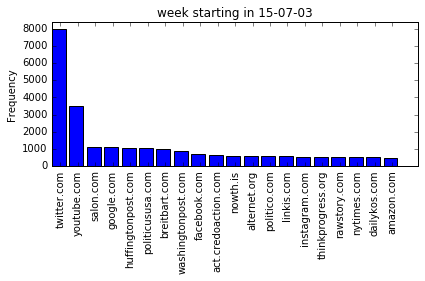

[0.8229479277526828, 0.7764212862601376, 0.7868852459016393, 0.7656221201623429, 0.7551107784431138, 0.7934116208024415, 0.8033268030145188, 0.7805839460365877, 0.6612801345217247, 0.8629191321499013, 0.7037234042553191, 0.7534886513750451, 0.7296867188483893, 0.700915948143092, 0.48077065467296726, 0.6939181987743139, 0.7960854240099523, 0.7100016815200941, 0.7334782196745387, 0.8622954985645407]


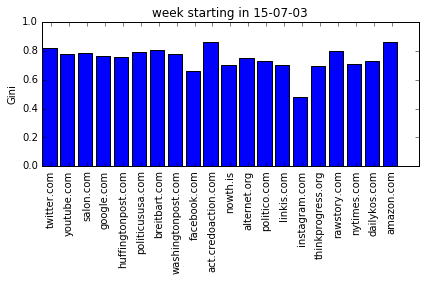

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'google.com', 'washingtonpost.com', 'politicususa.com', 'thehill.com', 'salon.com', 'thinkprogress.org', 'linkis.com', 'instagram.com', 'facebook.com', 'act.credoaction.com', 'thehilltalk.com', 'alternet.org', 'breitbart.com', 'nytimes.com', 'amazon.com', 'dailykos.com', 'flickr.com']
[8358, 3101, 1324, 1277, 1198, 1115, 1064, 900, 837, 742, 741, 704, 598, 562, 550, 539, 532, 491, 482, 469]
['uniteblue', 'p2', 'lgbt', 'tcot', 'feelthebern', 'blacklivesmatter', 'bernie2016', 'ainf', 'tntvote', 'tpp', 'tntweeters', 'stoprush', 'uslatino', 'gunsense', 'infidelivesmatter', 'hillary2016', 'pjnet', '1u', 'news', 'blacktwitter']
[13561, 10679, 7406, 7144, 6058, 5294, 4503, 3316, 3051, 2760, 2531, 2480, 2443, 2149, 2022, 1887, 1556, 1499, 1410, 1382]


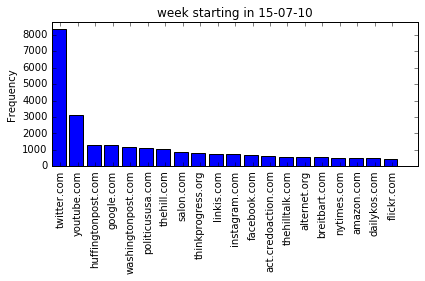

[0.8306713475506794, 0.7636215419880685, 0.7845099284575838, 0.7064651553316541, 0.8093587444742308, 0.8434508000687094, 0.8553176006447034, 0.8186838444323474, 0.7854983965206696, 0.7560068290566081, 0.5418646639234043, 0.6462987144943025, 0.8663996229971724, 0.7832424931322748, 0.7557319779061167, 0.759549602827919, 0.710857884009635, 0.8293948381955819, 0.701817589709145, 0.7919156237383932]


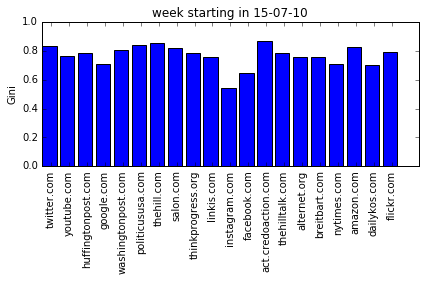

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'google.com', 'thehilltalk.com', 'facebook.com', 'washingtonpost.com', 'linkis.com', 'politicususa.com', 'salon.com', 'thinkprogress.org', 'instagram.com', 'rawstory.com', 'act.credoaction.com', 'politico.com', 'alternet.org', 'trofire.com', 'nytimes.com', 'flickr.com', 'motherjones.com']
[8828, 2819, 1488, 1371, 1321, 972, 878, 846, 784, 775, 729, 726, 713, 668, 601, 568, 518, 499, 483, 474]
['uniteblue', 'blacklivesmatter', 'p2', 'lgbt', 'tcot', 'feelthebern', 'bernie2016', 'ainf', 'tntvote', 'gunsense', 'stoprush', 'hillary2016', 'tntweeters', 'infidelivesmatter', 'uslatino', 'tpp', 'hillaryclinton', 'sandrabland', 'pjnet', 'standwithpp']
[12458, 10834, 8511, 6518, 6155, 5643, 3722, 3040, 2890, 2560, 2204, 2164, 2088, 2022, 1843, 1774, 1728, 1652, 1643, 1581]


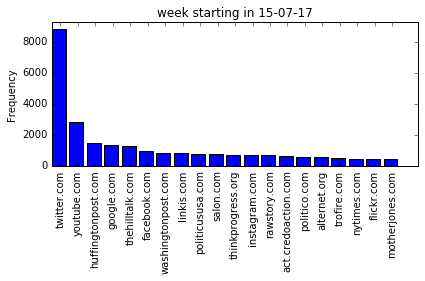

[0.8377951339620984, 0.7622070460924281, 0.8388510468023512, 0.6988196420121916, 0.797682163048174, 0.7276859947595051, 0.7145205851317685, 0.7591394329442138, 0.7830039067032839, 0.7932730951523047, 0.8139588751894429, 0.5976939954922209, 0.7896676794950082, 0.8254451079979908, 0.751836377769141, 0.7273521469794039, 0.719451534786308, 0.7191109964995726, 0.7513480344156777, 0.7518294399099352]


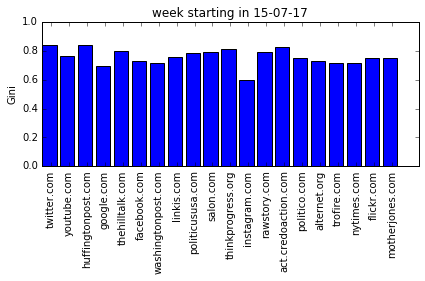

['twitter.com', 'youtube.com', 'instagram.com', 'go.berniesanders.com', 'google.com', 'thehilltalk.com', 'politicususa.com', 'flickr.com', 'huffingtonpost.com', 'linkis.com', 'petitions.moveon.org', 'facebook.com', 'thinkprogress.org', 'washingtonpost.com', 'salon.com', 'alternet.org', 'rawstory.com', 'dailykos.com', 'nytimes.com', 'thehill.com']
[11749, 3851, 1707, 1674, 1509, 1496, 1496, 1252, 1169, 1159, 1105, 1078, 1064, 1040, 911, 881, 757, 692, 684, 647]
['blacklivesmatter', 'uniteblue', 'p2', 'lgbt', 'tcot', 'feelthebern', 'gunsense', 'tpp', 'sandrabland', 'bernie2016', 'hillary2016', 'standwithpp', 'tntvote', 'ainf', 'stoprush', 'tntweeters', 'uslatino', 'sayhername', 'infidelivesmatter', 'berniesanders']
[19186, 14220, 10724, 7709, 7438, 7375, 4548, 4368, 3966, 3732, 3201, 2909, 2765, 2697, 2606, 2459, 2239, 2203, 2022, 1977]


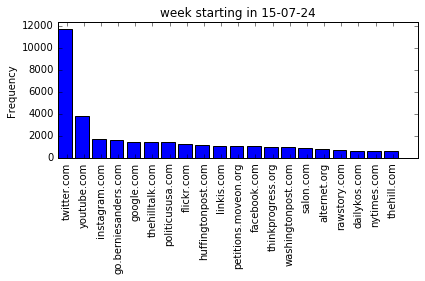

[0.8449194178356427, 0.7931346517046096, 0.6944512502080182, 0.8830866456011974, 0.7118212700789833, 0.7896976298643108, 0.8631003602526144, 0.859528625355586, 0.7842774132598258, 0.7785255746531373, 0.9042803350495658, 0.7052545462463528, 0.8088898176064957, 0.7907121876143732, 0.7908814869341185, 0.773082478426725, 0.8010587007306527, 0.7372897151973715, 0.7046836440842453, 0.7373316956463527]


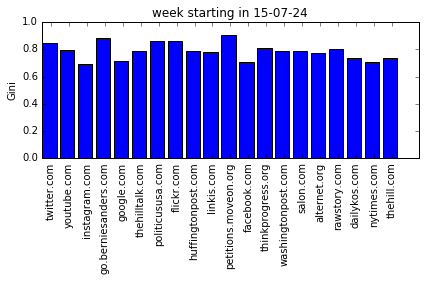

['twitter.com', 'youtube.com', 'politicususa.com', 'google.com', 'thehilltalk.com', 'huffingtonpost.com', 'washingtonpost.com', 'flickr.com', 'facebook.com', 'linkis.com', 'instagram.com', 'thinkprogress.org', 'thehill.com', 'motherjones.com', 'alternet.org', 'rawstory.com', 'nytimes.com', 'm.huffpost.com', 'slate.com', 'vote411.org']
[10851, 3750, 1802, 1638, 1489, 1068, 1044, 1017, 902, 893, 879, 802, 785, 778, 772, 761, 713, 701, 676, 672]
['uniteblue', 'blacklivesmatter', 'p2', 'lgbt', 'standwithpp', 'feelthebern', 'tcot', 'tpp', 'bernie2016', 'gunsense', 'hillary2016', 'tntvote', 'ainf', 'stoprush', 'tntweeters', 'infidelivesmatter', 'hillaryclinton', 'uslatino', 'union', 'pjnet']
[13964, 10961, 9949, 7863, 6923, 6695, 6621, 5016, 3437, 3115, 2978, 2770, 2764, 2123, 2044, 2022, 1964, 1917, 1634, 1544]


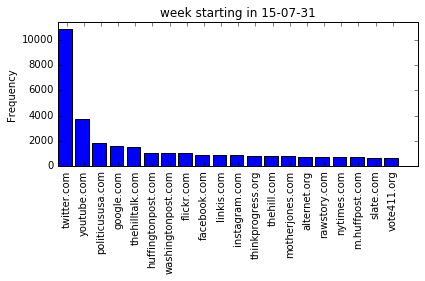

[0.8405554617666499, 0.7863882321996307, 0.8548247954464603, 0.6964169212835859, 0.8016045297360732, 0.7390985703250643, 0.7437425015340373, 0.8084253309166805, 0.6740746289400582, 0.7752873247055695, 0.6734167834804777, 0.7838243316966721, 0.7505587830033104, 0.7594669994860876, 0.7813138189244384, 0.8101354684476151, 0.7162591607756664, 0.7635130560382767, 0.8348071130113691, 0.6626097747231768]


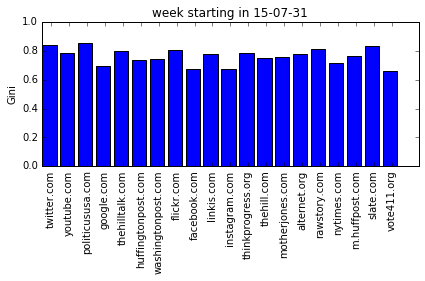

['twitter.com', 'youtube.com', 'google.com', 'thehill.com', 'cnn.com', 'thehilltalk.com', 'politicususa.com', 'nytimes.com', 'washingtonpost.com', 'rawstory.com', 'facebook.com', 'huffingtonpost.com', 'instagram.com', 'amp.twimg.com', 'linkis.com', 'vote411.org', 'breitbart.com', 'act.credoaction.com', 'thinkprogress.org', 'm.huffpost.com']
[15792, 5102, 2146, 1883, 1873, 1644, 1564, 1432, 1385, 1312, 1166, 1099, 1087, 1048, 932, 903, 822, 815, 720, 712]
['blacklivesmatter', 'uniteblue', 'feelthebern', 'p2', 'lgbt', 'tcot', 'berniesanders', 'bernie2016', 'ferguson', 'ainf', 'tntvote', 'hillaryclinton', 'gunsense', 'tpp', 'hillary2016', 'tntweeters', 'uslatino', 'infidelivesmatter', 'gopdebate', 'hillary']
[29907, 14610, 10029, 9864, 7104, 7086, 4782, 4428, 3843, 3191, 3056, 2984, 2724, 2524, 2516, 2382, 2080, 2022, 1788, 1677]


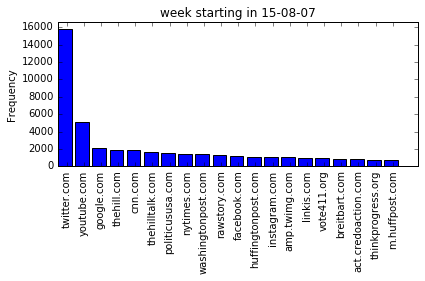

[0.8614312612881834, 0.8082052717295899, 0.7949160230501827, 0.8293316454509225, 0.8649007086210412, 0.7694742237718833, 0.8476143360453533, 0.8365229245413424, 0.7963339996545001, 0.8491708470460427, 0.7094276927676901, 0.7693970939206234, 0.6276291363184101, 0.8207660083782167, 0.7722892424342033, 0.6389105977206664, 0.7939265489206616, 0.8947398299215459, 0.7576179540352019, 0.8006403840360714]


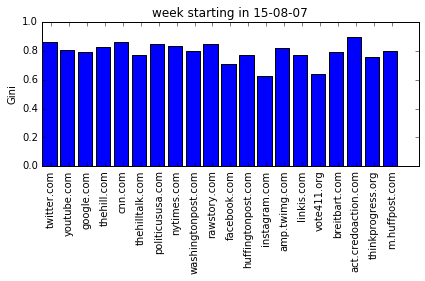

['twitter.com', 'youtube.com', 'politicususa.com', 'google.com', 'thehilltalk.com', 'facebook.com', 'breitbart.com', 'rawstory.com', 'thehill.com', 'linkis.com', 'flickr.com', 'huffingtonpost.com', 'washingtonpost.com', 'instagram.com', 'nytimes.com', 'cnn.com', 'theintercept.com', 'vine.co', 'politico.com', 'amazon.com']
[9725, 3434, 1720, 1466, 1376, 1176, 1051, 1050, 963, 954, 820, 758, 693, 676, 604, 600, 532, 528, 507, 501]
['blacklivesmatter', 'uniteblue', 'p2', 'feelthebern', 'tcot', 'lgbt', 'bernie2016', 'ainf', 'tntvote', 'hillaryclinton', 'hillary2016', 'berniesanders', 'gunsense', 'infidelivesmatter', 'tntweeters', 'hillary', 'tpp', 'pjnet', 'union', 'westandtogether']
[15617, 12490, 7924, 7804, 6155, 5950, 4152, 3104, 3033, 2821, 2585, 2192, 2082, 2022, 1827, 1685, 1552, 1467, 1294, 1232]


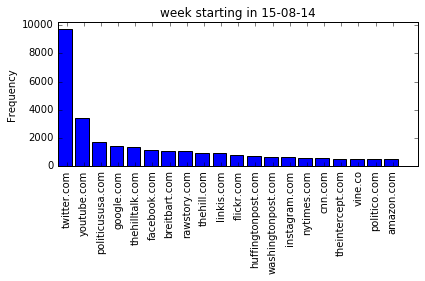

[0.8315446162810148, 0.7623146464396314, 0.8422390781261749, 0.7479989717343803, 0.7763244860586743, 0.7745202558635395, 0.8023043676849924, 0.8321253929444639, 0.8348976928097048, 0.7582019244912019, 0.850368980612883, 0.7224321295204162, 0.7547255658584346, 0.5607767742509648, 0.7156599402343619, 0.7584672854314313, 0.8402559155072611, 0.7686216900419461, 0.6904115684093437, 0.8154690366779445]


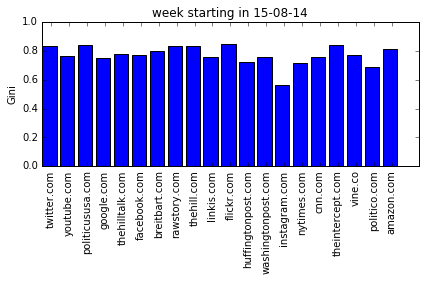

['twitter.com', 'youtube.com', 'politicususa.com', 'google.com', 'thehilltalk.com', 'facebook.com', 'rawstory.com', 'huffingtonpost.com', 'linkis.com', 'washingtonpost.com', 'flickr.com', 'instagram.com', 'thehill.com', 'slate.com', 'nytimes.com', 'breitbart.com', 'thinkprogress.org', 'bernie.to', 'usatoday.com', 'amazon.com']
[11003, 3836, 2683, 1814, 1493, 1258, 1215, 1130, 891, 809, 804, 778, 757, 751, 689, 654, 611, 587, 572, 569]
['uniteblue', 'blacklivesmatter', 'p2', 'feelthebern', 'lgbt', 'tcot', 'bernie2016', 'gunsense', 'tntvote', 'ainf', 'hillary2016', 'tntweeters', 'hillaryclinton', 'infidelivesmatter', 'berniesanders', '1u', 'uslatino', 'stoprush', 'tpp', 'pjnet']
[16010, 14348, 9416, 7827, 7681, 6991, 4498, 3033, 2703, 2666, 2466, 2312, 2115, 2022, 1980, 1589, 1574, 1476, 1450, 1436]


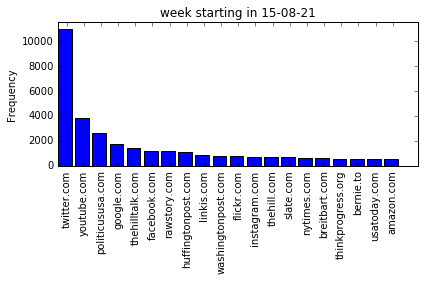

[0.8415743564316017, 0.7915236699860108, 0.8807281840292774, 0.746307246865017, 0.7864018793926117, 0.7469286364045303, 0.8337711517467249, 0.7529024343439882, 0.7615091575091575, 0.7643343195266272, 0.8672317202743166, 0.5219488960381972, 0.7105390034005044, 0.8434864104967198, 0.7139808153477218, 0.7777795069721115, 0.7327017526964561, 0.8515151515151516, 0.7688229325215626, 0.8368784456457742]


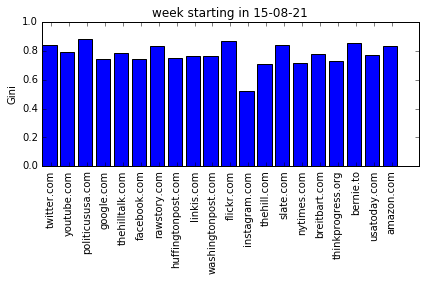

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'politicususa.com', 'google.com', 'breitbart.com', 'thehilltalk.com', 'facebook.com', 'feel-the-bern.com', 'linkis.com', 'rawstory.com', 'washingtonpost.com', 'instagram.com', 'nytimes.com', 'thinkprogress.org', 'dailykos.com', 'flickr.com', 'alternet.org', 'reddit.com', 'amazon.com']
[12236, 3590, 2773, 2630, 1894, 1644, 1244, 1208, 1114, 1052, 910, 896, 788, 714, 674, 645, 614, 598, 570, 566]
['blacklivesmatter', 'uniteblue', 'lgbt', 'feelthebern', 'p2', 'tcot', 'bernie2016', 'gunsense', 'tntvote', 'ainf', 'berniesanders', 'hillary2016', 'infidelivesmatter', 'ky', 'tntweeters', 'hillaryclinton', 'pjnet', 'uslatino', 'hillary', 'blm']
[20650, 15531, 9439, 9127, 9071, 7757, 5176, 3905, 2497, 2376, 2174, 2155, 2022, 2009, 1950, 1819, 1631, 1586, 1569, 1496]


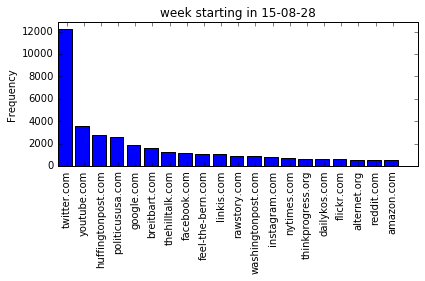

[0.8408615740316784, 0.7808510866111187, 0.8976760374452958, 0.8546264124499985, 0.7450593920825527, 0.8279108199143583, 0.7525302177662404, 0.7143597216277798, 0.0, 0.7546262859110181, 0.8062340200877859, 0.7223288291889876, 0.557283581643742, 0.705151010017628, 0.7673112070675733, 0.7528226301948929, 0.857289199904212, 0.6697771754978815, 0.8205527086383602, 0.8338504174105699]


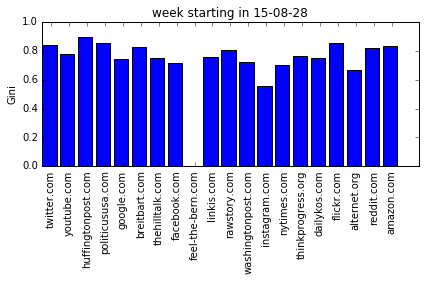

['twitter.com', 'newswire.net', 'youtube.com', 'politicususa.com', 'thehilltalk.com', 'google.com', 'breitbart.com', 'nytimes.com', 'facebook.com', 'rawstory.com', 'alternet.org', 'Newswire.net', 'instagram.com', 'huffingtonpost.com', 'linkis.com', 'thehill.com', 'washingtonpost.com', 'flickr.com', 'secure.actblue.com', 'politico.com']
[7557, 4066, 2760, 2192, 1736, 1566, 833, 712, 684, 658, 617, 616, 616, 603, 579, 578, 563, 522, 493, 415]
['uniteblue', 'blacklivesmatter', 'p2', 'feelthebern', 'tcot', 'lgbt', 'hillary', 'trump', 'snowden', 'bernie2016', 'ainf', 'tntvote', 'gunsense', 'infidelivesmatter', 'hillary2016', 'berniesanders', 'union', 'pjnet', 'hillaryclinton', 'tntweeters']
[12002, 8821, 7507, 6457, 6212, 5812, 5443, 4552, 4102, 2997, 2615, 2445, 2266, 2022, 1954, 1867, 1707, 1438, 1421, 1344]


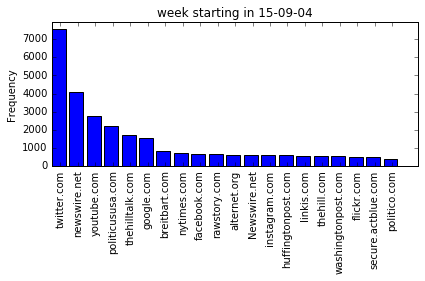

[0.8015662333696446, 0.0, 0.7794824945153376, 0.8647289881582748, 0.7795268472784859, 0.7081585357201977, 0.7946081523094298, 0.726911124922312, 0.652653247385736, 0.7626147515036404, 0.7244427125856652, 0.0, 0.5282301439201991, 0.7095850378469096, 0.7272308476002747, 0.7042826478327101, 0.7311723796989719, 0.8206740638723592, 0.8152622478386167, 0.7093039225007659]


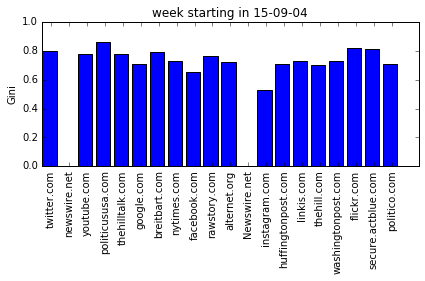

['twitter.com', 'politicususa.com', 'youtube.com', 'thehilltalk.com', 'google.com', 'huffingtonpost.com', 'facebook.com', 'alternet.org', 'rawstory.com', 'linkis.com', 'washingtonpost.com', 'newswire.net', 'dailykos.com', 'breitbart.com', 'motherjones.com', 'instagram.com', 'thenation.com', 'slate.com', 'nationalvoterregistrationday.org', 'amazon.com']
[11994, 3252, 3113, 2304, 1825, 1140, 1033, 857, 857, 820, 742, 736, 669, 650, 583, 557, 544, 542, 496, 489]
['uniteblue', 'blacklivesmatter', 'feelthebern', 'p2', 'lgbt', 'tcot', 'bernie2016', 'hillary2016', 'tntvote', 'gunsense', 'berniesanders', 'ainf', 'hillary', 'infidelivesmatter', 'inners', 'uslatino', 'istandwithahmed', 'pjnet', 'stoprush', 'hillaryclinton']
[14817, 10114, 9430, 9152, 7135, 6763, 3889, 3768, 3150, 2598, 2353, 2231, 2086, 2022, 1904, 1682, 1578, 1540, 1300, 1248]


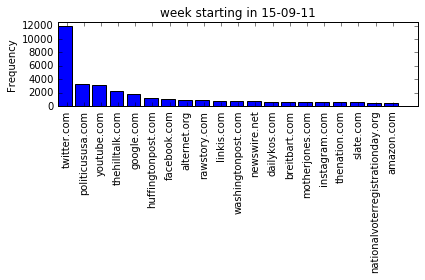

[0.8530699856643784, 0.8795522689668684, 0.7579002730810012, 0.8040002656722932, 0.730408632697654, 0.7532033954569166, 0.6796260840184706, 0.7578700271806276, 0.806716495380463, 0.7473501528871469, 0.7033048759021299, 0.0, 0.7210316696163028, 0.7664746245468669, 0.7669542409303501, 0.495799649754291, 0.7992997374015256, 0.8107030487143322, 0.645700604634176, 0.8368251782852348]


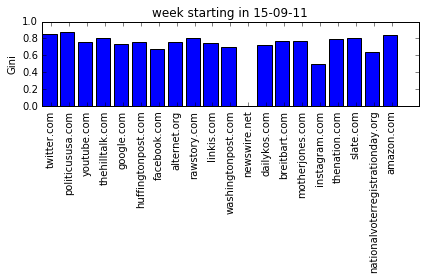

['twitter.com', 'youtube.com', 'politicususa.com', 'google.com', 'thehilltalk.com', 'marijuanastocks.com', 'rawstory.com', 'huffingtonpost.com', 'facebook.com', 'linkis.com', 'breitbart.com', 'washingtonpost.com', 'alternet.org', 'nytimes.com', 'thenation.com', 'dailykos.com', 'slate.com', 'amp.twimg.com', 'politico.com', 'secure.ppaction.org']
[10061, 3899, 3205, 1721, 1341, 1052, 1016, 1002, 937, 850, 799, 659, 652, 649, 648, 621, 618, 611, 598, 565]
['uniteblue', 'blacklivesmatter', 'feelthebern', 'p2', 'lgbt', 'tcot', 'standwithpp', 'bernie2016', 'tntvote', 'gunsense', 'berniesanders', 'news', 'infidelivesmatter', 'ainf', 'tpp', 'uslatino', 'hillary2016', 'pjnet', 'stoprush', 'dems']
[14377, 9347, 9045, 8539, 7082, 6850, 3738, 3646, 2501, 2274, 2222, 2104, 2022, 1977, 1752, 1724, 1660, 1617, 1388, 1340]


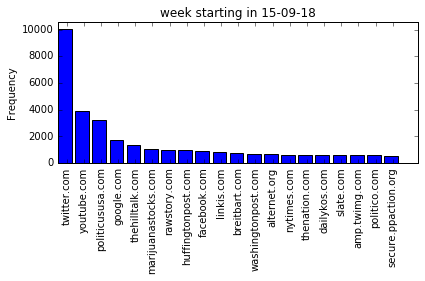

[0.825751035922562, 0.8425151752109917, 0.8785531568394989, 0.719825978058103, 0.7568587052864284, 0.0, 0.8483877011470325, 0.7443202595563578, 0.6831190393303774, 0.7609333333333334, 0.7673305722307537, 0.7026127504553734, 0.7679802722056244, 0.6949062699225661, 0.7903856157714316, 0.7374795128222743, 0.8306973640306974, 0.8446081105655574, 0.7050880383959776, 0.7104565537555229]


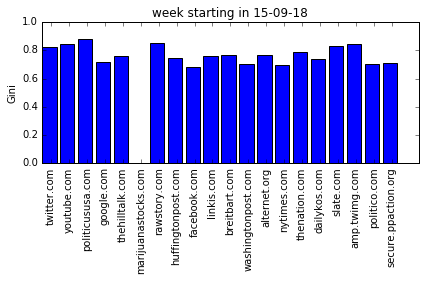

['twitter.com', 'youtube.com', 'politicususa.com', 'twibbon.com', 'google.com', 'tedcruz.org', 'instagram.com', 'washingtonpost.com', 'huffingtonpost.com', 'nytimes.com', 'facebook.com', 'istandwithpp.org', 'thehilltalk.com', 'linkis.com', 'medium.com', 'rawstory.com', 'slate.com', 'motherjones.com', 'breitbart.com', 'thinkprogress.org']
[9910, 3544, 3512, 2470, 1539, 1341, 1143, 1074, 1062, 1025, 1020, 1009, 998, 963, 835, 809, 716, 598, 584, 573]
['uniteblue', 'standwithpp', 'p2', 'feelthebern', 'lgbt', 'tcot', 'blacklivesmatter', 'tpp', 'bernie2016', 'pinkout', 'gunsense', 'hillary', 'tntvote', 'ainf', 'infidelivesmatter', 'uslatino', 'berniesanders', 'millennials', 'pjnet', 'news']
[15683, 10998, 9065, 7668, 7257, 6719, 6143, 4053, 3429, 3221, 3108, 2841, 2488, 2356, 2022, 1936, 1730, 1652, 1592, 1590]


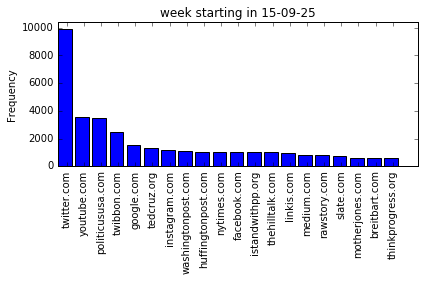

[0.8281561125004553, 0.8257666056449768, 0.8839782615798473, 0.9361735089078234, 0.7157751670122092, 0.5635137371731215, 0.6477960258164875, 0.7639753684437602, 0.7410968649452699, 0.8144608387678555, 0.7138140701190263, 0.8817598138492696, 0.7376798256652768, 0.7859842726443517, 0.8868638933764136, 0.8160062397947282, 0.8520880860375251, 0.790318957771788, 0.7482395965293879, 0.7248516783244628]


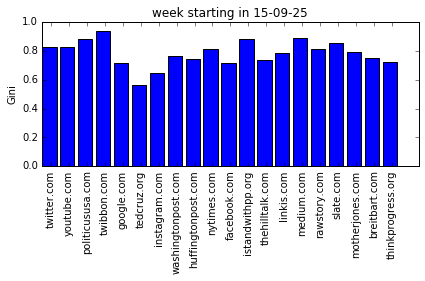

['twitter.com', 'youtube.com', 'politicususa.com', 'tedcruz.org', 'fightthetpp.org', 'linkis.com', 'google.com', 'nytimes.com', 'huffingtonpost.com', 'washingtonpost.com', 'rawstory.com', 'medium.com', 'breitbart.com', 'thehill.com', 'facebook.com', 'slate.com', 'alternet.org', 'thinkprogress.org', 'politico.com', 'bloomberg.com']
[12702, 4329, 3012, 2752, 2129, 1370, 1360, 1323, 1165, 1082, 1029, 945, 886, 844, 832, 729, 699, 681, 677, 646]
['tpp', 'uniteblue', 'p2', 'gunsense', 'feelthebern', 'tcot', 'lgbt', 'blacklivesmatter', 'hillary', 'bernie2016', 'ainf', 'tntvote', 'millennials', 'stoptpp', 'infidelivesmatter', 'hillary2016', 'cruz2016', 'pjnet', 'elxn42', 'stoprush']
[27415, 16282, 8715, 7724, 7665, 7580, 6613, 5426, 3835, 3191, 2876, 2766, 2282, 2095, 2022, 1780, 1725, 1695, 1658, 1653]


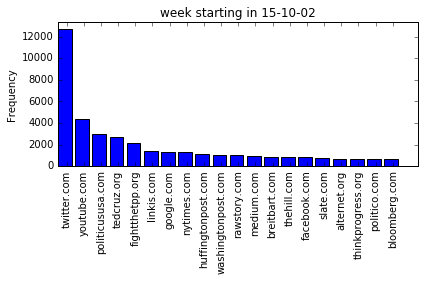

[0.8338730976509252, 0.7898008201713733, 0.8906419920909541, 0.35775759734093066, 0.499061473486626, 0.7770544659176692, 0.7154165486282116, 0.7919706361814576, 0.7767721015533509, 0.766838178139877, 0.8226735257985258, 0.8983657368272753, 0.7862950434137986, 0.7569396551724138, 0.7022179089590417, 0.8208762886597938, 0.7959209687699171, 0.7552413324269205, 0.7976486103962944, 0.8892951317334752]


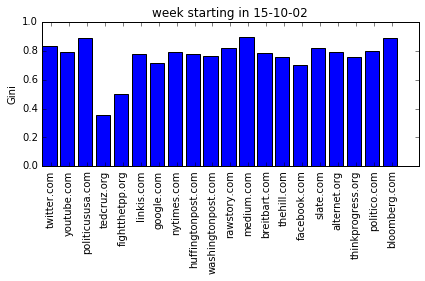

['twitter.com', 'youtube.com', 'cnn.com', 'amp.twimg.com', 'tedcruz.org', 'wikileaks.org', 'thehill.com', 'politicususa.com', 'nytimes.com', 'breitbart.com', 'washingtonpost.com', 'snappytv.com', 'google.com', 'slate.com', 'vine.co', 'glaad.org', 'instagram.com', 'secure.avaaz.org', 'huffingtonpost.com', 'facebook.com']
[26836, 19834, 8750, 6409, 3481, 3378, 2952, 2780, 2072, 2014, 1995, 1880, 1857, 1620, 1611, 1577, 1554, 1552, 1524, 1450]
['demdebate', 'tpp', 'uniteblue', 'blacklivesmatter', 'feelthebern', 'p2', 'lgbt', 'tcot', 'gunsense', 'bethiphopawards', 'sabesquetequierecuando', 'amas', 'nedtsj', 'foracunha', 'bernie2016', 'hillary', 'debatewithbernie', 'givetwitteraslogan', 'weareperfectday2', 'imwithher']
[78794, 17831, 16124, 14682, 12534, 9101, 8611, 8003, 5143, 5135, 4862, 4627, 4108, 4097, 4050, 4041, 3486, 3027, 2744, 2731]


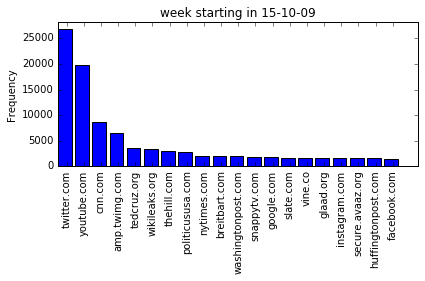

[0.8774663933825059, 0.9486271954111215, 0.935843057427708, 0.9182922396559036, 0.611743090850216, 0.9371750295065233, 0.8565435701810828, 0.8809677631147003, 0.8124912753063921, 0.859547327596655, 0.8247928978115977, 0.831140350877193, 0.7330188101048597, 0.8641118583170379, 0.8254483925549916, 0.9082216808769793, 0.6512395534886884, 0.9264588647959183, 0.7887180422965367, 0.7294460763950705]


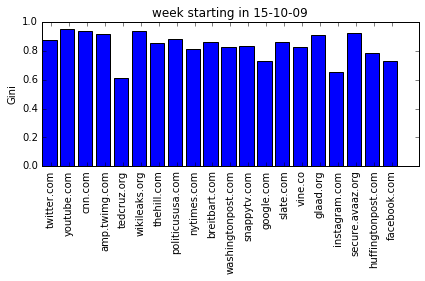

['twitter.com', 'youtube.com', 'politicususa.com', 'google.com', 'tedcruz.org', 'linkis.com', 'washingtonpost.com', 'facebook.com', 'rawstory.com', 'breitbart.com', 'huffingtonpost.com', 'wikileaks.org', 'alternet.org', 'act.credoaction.com', 'nytimes.com', 'slate.com', 'thehill.com', 'thinkprogress.org', 'motherjones.com', 'politico.com']
[10591, 3414, 2588, 1589, 1428, 1205, 1167, 990, 919, 907, 780, 718, 710, 705, 696, 677, 675, 645, 643, 625]
['uniteblue', 'p2', 'feelthebern', 'blacklivesmatter', 'tcot', 'lgbt', 'sabesquetequierecuando', 'amas', 'tpp', 'nedtsj', 'foracunha', 'gunsense', 'hillary', 'bernie2016', 'demdebate', 'givetwitteraslogan', 'ainf', 'weareperfectday2', 'berniesanders', 'tntvote']
[15376, 9267, 8169, 7527, 6547, 6535, 4862, 4627, 4616, 4108, 4097, 4002, 3733, 3647, 3499, 3027, 2806, 2744, 2670, 2437]


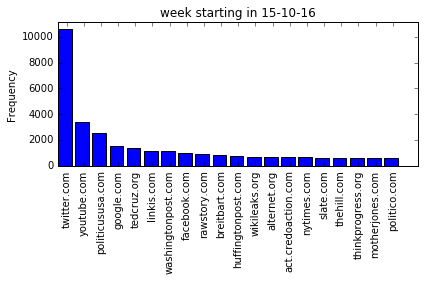

[0.8144583680199076, 0.7388983953731665, 0.8828124867289859, 0.7070112676142988, 0.7842123096547875, 0.7965949397020572, 0.7724662810246682, 0.7443159607488063, 0.8063637203288077, 0.7847602048405261, 0.7453663257789883, 0.8672761937776237, 0.823759476914437, 0.8786258805365241, 0.7744757935369014, 0.7907487815684537, 0.7064237235292707, 0.7428677219290938, 0.7424765491508875, 0.7283121363945017]


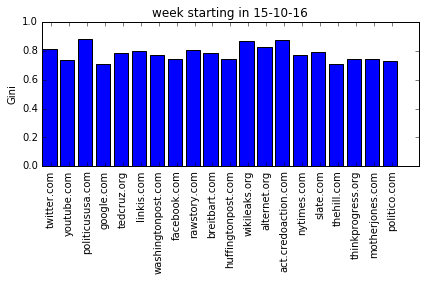

['twitter.com', 'youtube.com', 'politicususa.com', 'breitbart.com', 'google.com', 'linkis.com', 'washingtonpost.com', 'instagram.com', 'hillaryclinton.com', 'huffingtonpost.com', 'facebook.com', 'thehill.com', 'alternet.org', 'nytimes.com', 'thinkprogress.org', 'slate.com', 'rawstory.com', 'townhall.com', 'westernjournalism.com', 'thehilltalk.com']
[12743, 3787, 2796, 1779, 1531, 1442, 1213, 1202, 952, 948, 845, 842, 837, 823, 769, 765, 719, 699, 663, 603]
['uniteblue', 'blacklivesmatter', 'p2', 'feelthebern', 'tcot', 'lgbt', 'sabesquetequierecuando', 'hillary2016', 'amas', 'nedtsj', 'foracunha', 'bernie2016', 'hillary', 'gunsense', 'hillaryclinton', 'ainf', 'tntvote', 'givetwitteraslogan', 'tpp', 'weareperfectday2']
[15944, 9837, 9443, 8527, 6839, 6759, 4862, 4670, 4627, 4108, 4097, 4075, 4040, 3863, 3714, 3316, 3107, 3027, 2896, 2744]


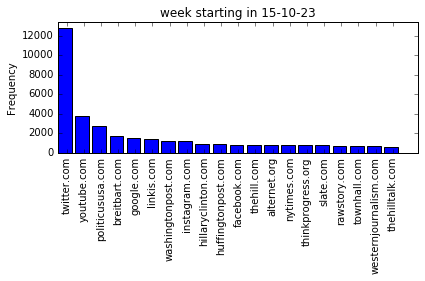

[0.8375644647232154, 0.8057141129600315, 0.8857714020057116, 0.8493546628472256, 0.7000887206482522, 0.807356546528202, 0.7835448243449653, 0.6997664704765522, 0.9003776916662579, 0.7264549045424622, 0.7114241236900952, 0.759910584830087, 0.8280037871846558, 0.7298513302034428, 0.7756128597220108, 0.8111226371599816, 0.7993177860874033, 0.8661351102197926, 0.8436161096829478, 0.7738451687263879]


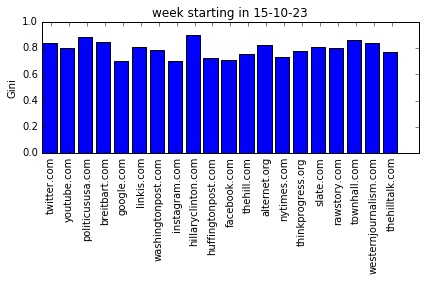

['twitter.com', 'youtube.com', 'politicususa.com', 'breitbart.com', 'dailycaller.com', 'google.com', 'linkis.com', 'townhall.com', 'thehilltalk.com', 'westernjournalism.com', 'huffingtonpost.com', 'thehill.com', 'washingtonpost.com', 'rawstory.com', 'facebook.com', 'thinkprogress.org', 'slate.com', 'act.credoaction.com', 'alternet.org', 'mfat.govt.nz']
[10288, 4084, 2867, 2054, 1714, 1509, 1457, 1126, 1061, 983, 935, 850, 844, 696, 683, 654, 644, 629, 558, 544]
['uniteblue', 'p2', 'blacklivesmatter', 'feelthebern', 'lgbt', 'tcot', 'tpp', 'hillary2016', 'sabesquetequierecuando', 'amas', 'nedtsj', 'foracunha', 'bernie2016', 'gunsense', 'givetwitteraslogan', 'hillary', 'weareperfectday2', 'stoprush', 'ainf', 'hillaryclinton']
[17195, 9801, 8983, 7086, 6980, 6554, 5772, 5254, 4862, 4627, 4108, 4097, 3740, 3675, 3027, 2947, 2744, 2706, 2660, 2648]


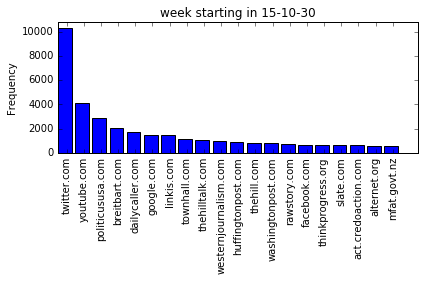

[0.8122721503420591, 0.8057474632473446, 0.8962446122988947, 0.8317071698720528, 0.9193797873131554, 0.7220850689419829, 0.8067795673129133, 0.8931124106562703, 0.8221339462878922, 0.8240606236684098, 0.742191468862223, 0.7754963055511462, 0.7592883533774807, 0.8107303037996108, 0.6425227614963229, 0.7728374709076804, 0.8162962275532458, 0.7740173557937723, 0.8091005291005291, 0.87407580964282]


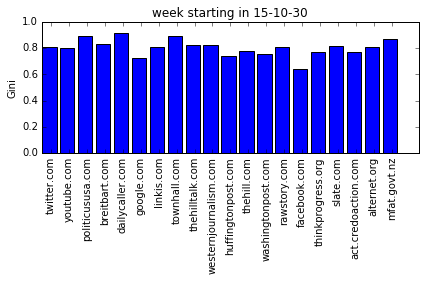

['twitter.com', 'youtube.com', 'politicususa.com', 'google.com', 'linkis.com', 'breitbart.com', 'washingtonpost.com', 'rawstory.com', 'townhall.com', 'westernjournalism.com', 'thehilltalk.com', 'conservativereport.org', 'huffingtonpost.com', 'alternet.org', 'facebook.com', 'thinkprogress.org', 'instagram.com', 'slate.com', 'thehill.com', 'theguardian.com']
[12437, 3701, 3223, 1644, 1618, 1414, 1154, 916, 888, 871, 847, 845, 821, 806, 753, 745, 674, 651, 647, 641]
['uniteblue', 'tpp', 'p2', 'blacklivesmatter', 'lgbt', 'feelthebern', 'tcot', 'hillary2016', 'bernie2016', 'sabesquetequierecuando', 'amas', 'nedtsj', 'foracunha', 'ainf', 'gunsense', 'tntvote', 'givetwitteraslogan', 'berniesanders', 'hillary', 'stoprush']
[18330, 10453, 9817, 8599, 8540, 8118, 6522, 5141, 4960, 4862, 4627, 4108, 4097, 3582, 3469, 3225, 3027, 2918, 2790, 2784]


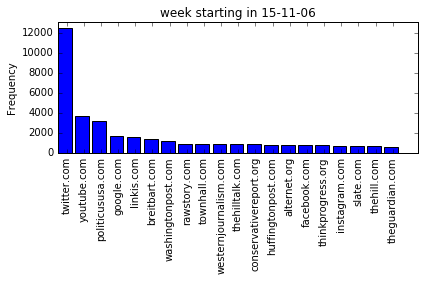

[0.8333782808494468, 0.7571211063883778, 0.8661819941994413, 0.732791461412151, 0.8346004146451107, 0.8119134963397259, 0.7522703064582512, 0.8107896516138215, 0.877373940265827, 0.8697333772218565, 0.7602263269398101, 0.797033118675253, 0.7019399452535426, 0.8070480033785369, 0.6447874521374104, 0.7678205711685061, 0.5702885081232785, 0.8192727272727273, 0.7458167927496068, 0.9171128721353609]


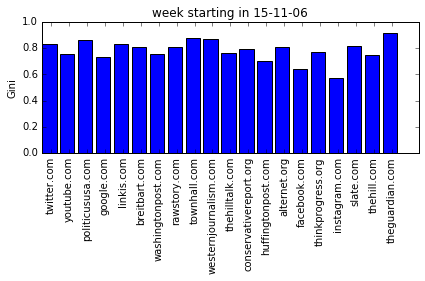

['twitter.com', 'amp.twimg.com', 'youtube.com', 'politicususa.com', 'cbsnews.com', 'linkis.com', 'google.com', 'slate.com', 'thehill.com', 'vpnmaster.com', 'breitbart.com', 'pashmalou.com', 'hillaryclinton.com', 'foxbusiness.com', 'huffingtonpost.com', 'nytimes.com', 'time.com', 'rawstory.com', 'politico.com', 'thehilltalk.com']
[18377, 5022, 4303, 3335, 1875, 1783, 1759, 1726, 1595, 1504, 1215, 1165, 1118, 1105, 1089, 972, 947, 935, 932, 908]
['demdebate', 'uniteblue', 'p2', 'feelthebern', 'blacklivesmatter', 'tcot', 'lgbt', 'parisattacks', 'islamophobia', 'hillary2016', 'sabesquetequierecuando', 'tpp', 'bernie2016', 'nedtsj', 'foracunha', 'ainf', 'tntvote', 'givetwitteraslogan', 'gunsense', 'hillaryclinton']
[29856, 18025, 10851, 9241, 8706, 7782, 6259, 5901, 5886, 5081, 4862, 4362, 4220, 4108, 4097, 3990, 3756, 3027, 2947, 2883]


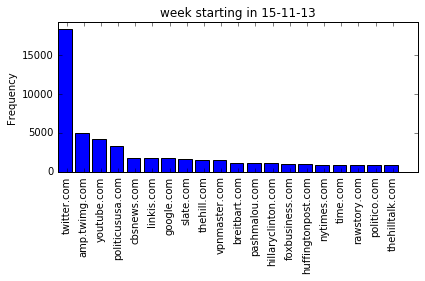

[0.8750684120821892, 0.9022430153370182, 0.8269022744544678, 0.8656611801959296, 0.9027433300472815, 0.8401270944561969, 0.7493486178625843, 0.9044250132485426, 0.823070860266204, 0.09133276842997216, 0.799829093384143, 0.49914236706689535, 0.873173459056772, 0.6790050728195058, 0.7487059852737479, 0.7937270446040167, 0.8465522494160658, 0.8355261445563624, 0.7741059710333453, 0.8049794422052539]


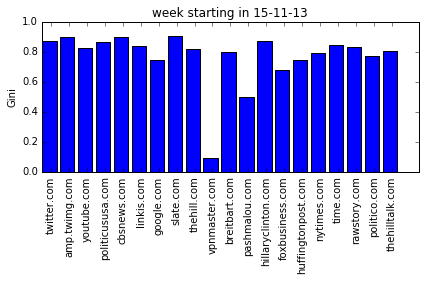

['twitter.com', 'politicususa.com', 'youtube.com', 'google.com', 'linkis.com', 'thinkprogress.org', 'huffingtonpost.com', 'nytimes.com', 'breitbart.com', 'washingtonpost.com', 'rawstory.com', 'textmunication.com', 'foxbusiness.com', 'westernjournalism.com', 'salon.com', 'facebook.com', 'alternet.org', 'instagram.com', 'thehilltalk.com', 'thenation.com']
[10267, 2530, 2472, 1240, 1191, 1016, 887, 880, 879, 828, 822, 820, 736, 712, 708, 616, 611, 577, 575, 570]
['uniteblue', 'blacklivesmatter', 'p2', 'feelthebern', 'tcot', 'sabesquetequierecuando', 'lgbt', 'nedtsj', 'foracunha', 'hillary2016', 'givetwitteraslogan', 'weareperfectday2', 'bernie2016', 'gunsense', 'ainf', 'harmonizersaretired', 'tpp', 'tntvote', 'infidelivesmatter', 'stoprush']
[14048, 12441, 8268, 6342, 5522, 4862, 4714, 4108, 4097, 3042, 3027, 2744, 2742, 2466, 2284, 2275, 2244, 2034, 2022, 1962]


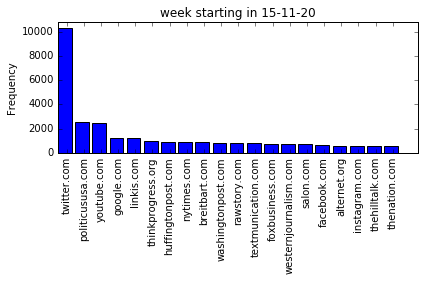

[0.8385641164412857, 0.8883506159966014, 0.7340282849162806, 0.7181391619856202, 0.8228887885275882, 0.8173224907449773, 0.767259978425027, 0.7665942796610169, 0.7941017316017316, 0.7304574654003145, 0.8105490320533164, 0.19964933678914468, 0.1868982989504162, 0.7560391104294478, 0.7886780124149811, 0.6393745367175319, 0.8451254627725215, 0.5446325453561979, 0.7515506112577373, 0.7711381310135759]


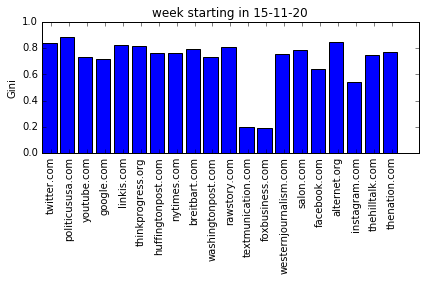

['twitter.com', 'politicususa.com', 'youtube.com', 'google.com', 'linkis.com', 'rawstory.com', 'washingtonpost.com', 'westernjournalism.com', 'breitbart.com', 'secure.ppaction.org', 'thinkprogress.org', 'huffingtonpost.com', 'foxbusiness.com', 'alternet.org', 'slate.com', 'thenation.com', 'nytimes.com', 'thehill.com', 'facebook.com', 'instagram.com']
[13026, 3004, 2116, 1521, 1326, 1036, 1005, 874, 838, 836, 809, 795, 793, 687, 628, 626, 624, 608, 590, 537]
['uniteblue', 'blacklivesmatter', 'p2', 'tcot', 'lgbt', 'feelthebern', 'gunsense', 'sabesquetequierecuando', 'standwithpp', 'nedtsj', 'foracunha', 'hillary2016', 'givetwitteraslogan', 'bernie2016', 'weareperfectday2', 'tpp', 'ainf', 'tntvote', 'harmonizersaretired', 'infidelivesmatter']
[14833, 8859, 8722, 6730, 5887, 5573, 5003, 4862, 4798, 4108, 4097, 3176, 3027, 2781, 2744, 2391, 2384, 2320, 2275, 2022]


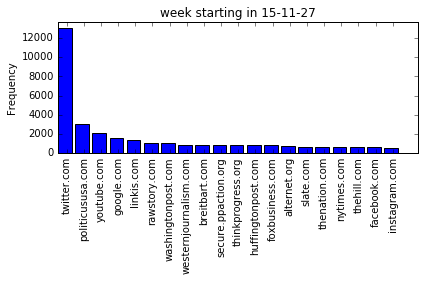

[0.8492703954812794, 0.8933299258880654, 0.7079475476062487, 0.708337963183432, 0.8431968652884745, 0.8309234144395692, 0.734173461823573, 0.8581080351842858, 0.7989786547309106, 0.8789066583045887, 0.7608164492726385, 0.6967826712693066, 0.19389213775178687, 0.8240716199899873, 0.8664420485175203, 0.8012720258575748, 0.6851244845764393, 0.7240535411047847, 0.6209983037915618, 0.5136795333519779]


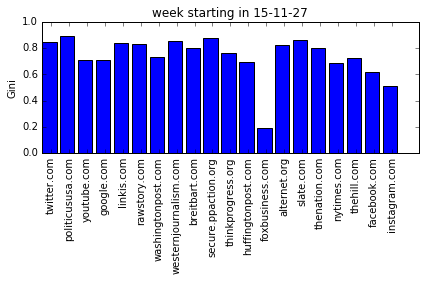

['twitter.com', 'politicususa.com', 'youtube.com', 'linkis.com', 'google.com', 'huffingtonpost.com', 'westernjournalism.com', 'rawstory.com', 'breitbart.com', 'facebook.com', 'nytimes.com', 'thinkprogress.org', 'washingtonpost.com', 'act.credoaction.com', 'thenation.com', 'alternet.org', 'slate.com', 'instagram.com', 'thehill.com', 'motherjones.com']
[12743, 3056, 2279, 1935, 1364, 1056, 1034, 867, 863, 847, 815, 708, 701, 681, 667, 628, 626, 531, 517, 498]
['uniteblue', 'p2', 'tcot', 'feelthebern', 'blacklivesmatter', 'gunsense', 'lgbt', 'sabesquetequierecuando', 'nedtsj', 'foracunha', 'bernie2016', 'ainf', 'tntvote', 'givetwitteraslogan', 'hillary2016', 'weareperfectday2', 'standwithpp', 'hillaryclinton', 'harmonizersaretired', 'tpp']
[14521, 10556, 7161, 6775, 6550, 5995, 5576, 4862, 4108, 4097, 3209, 3055, 3045, 3027, 2871, 2744, 2435, 2386, 2275, 2241]


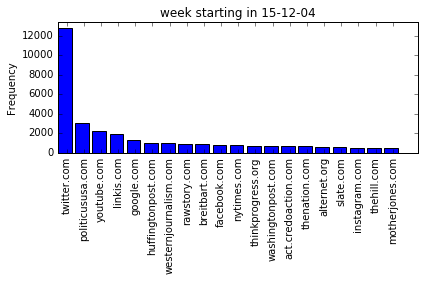

[0.8467650554936818, 0.8904279126542791, 0.7237899662747511, 0.833183778486139, 0.7071993075417733, 0.7387373700960954, 0.8515398978189056, 0.8053554342320032, 0.8118779645794156, 0.6799179774265265, 0.7228980022439171, 0.7502824858757062, 0.7353264526285054, 0.9027637059551953, 0.7996031746031746, 0.8230007763975156, 0.8712347354138399, 0.5487519217383988, 0.6748481529423479, 0.7903046594982079]


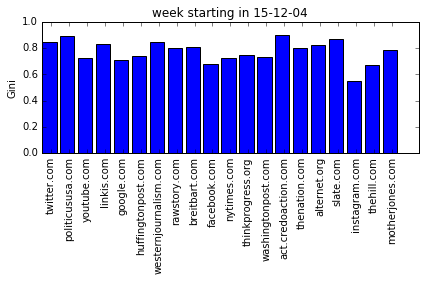

['twitter.com', 'politicususa.com', 'youtube.com', 'google.com', 'linkis.com', 'huffingtonpost.com', 'rawstory.com', 'breitbart.com', 'thinkprogress.org', 'facebook.com', 'act.credoaction.com', 'thenation.com', 'alternet.org', 'washingtonpost.com', 'slate.com', 'nytimes.com', '2016.democracyforamerica.com', 'motherjones.com', 'amazon.com', 'reddit.com']
[12013, 3166, 2554, 1680, 1202, 1189, 1043, 897, 701, 676, 644, 627, 613, 606, 590, 541, 517, 479, 452, 446]
['uniteblue', 'p2', 'feelthebern', 'tcot', 'blacklivesmatter', 'lgbt', 'sabesquetequierecuando', 'nedtsj', 'bernie2016', 'foracunha', 'gunsense', 'givetwitteraslogan', 'ainf', 'weareperfectday2', 'tntvote', 'berniesanders', 'harmonizersaretired', 'hillary2016', 'hillary', 'infidelivesmatter']
[13300, 9518, 9432, 6822, 6374, 5725, 4862, 4108, 4103, 4097, 3787, 3027, 2803, 2744, 2568, 2384, 2275, 2130, 2075, 2022]


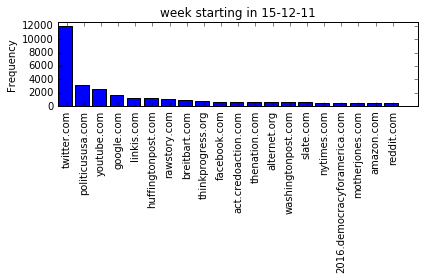

[0.8417178995592645, 0.8617394695787831, 0.7352991320115801, 0.7158161635521482, 0.8073037796552817, 0.7420555186753314, 0.8168995578016425, 0.823458334913232, 0.7731552426313246, 0.6320267736678874, 0.9071223316912972, 0.7943947655398037, 0.7992591335821739, 0.7159483746149734, 0.8493568958063121, 0.701180118873288, 0.8470869912210695, 0.7677702044790652, 0.7810468387758944, 0.6729616306954437]


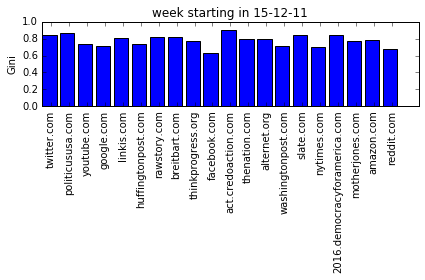

['twitter.com', 'youtube.com', 'politicususa.com', 'abcnews.go.com', 'thehill.com', 'breitbart.com', 'google.com', 'nytimes.com', 'huffingtonpost.com', 'hillaryclinton.com', 'cnn.com', 'amp.twimg.com', 'linkis.com', 'vine.co', 'progressivemind.ucoz.com', 'politico.com', 'washingtonpost.com', 'facebook.com', 'slate.com', 'cbsnews.com']
[24760, 3413, 2423, 2319, 1950, 1907, 1573, 1568, 1495, 1437, 1424, 1418, 1239, 1235, 1170, 1101, 1069, 1044, 1013, 896]
['demdebate', 'feelthebern', 'uniteblue', 'p2', 'blacklivesmatter', 'tcot', 'bernie2016', 'lgbt', 'hillary', 'sabesquetequierecuando', 'hillaryclinton', 'berniesanders', 'nedtsj', 'gunsense', 'imwithher', 'dnc', 'givetwitteraslogan', 'hillary2016', 'weareperfectday2', 'ainf']
[30601, 16236, 11793, 8569, 8219, 6451, 6280, 5670, 4989, 4862, 4529, 4331, 4108, 3502, 3482, 3451, 3027, 2858, 2744, 2412]


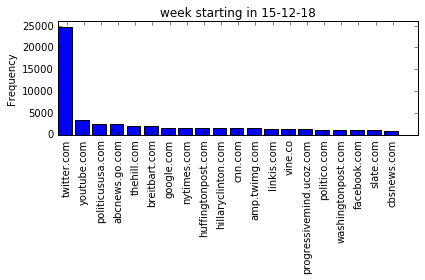

[0.8880823531676598, 0.7749499831993678, 0.8693542005539192, 0.8981268541728952, 0.8153321729206621, 0.8299672663619856, 0.7043494669623533, 0.8086132765556605, 0.7401346762589928, 0.9122188846116578, 0.8187444739168878, 0.8699471576183905, 0.7904100048449613, 0.8475852562793547, 0.6751012145748988, 0.7893215293683677, 0.7553768495349947, 0.6942712550607287, 0.8360951599671862, 0.8635126559966156]


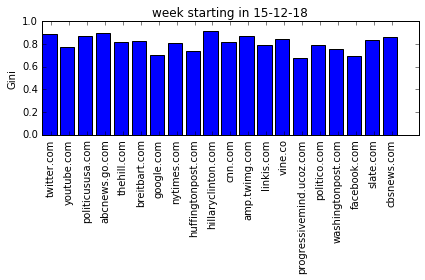

['twitter.com', 'youtube.com', 'politicususa.com', 'google.com', 'progressivemind.ucoz.com', 'breitbart.com', 'thehill.com', 'dailykos.com', 'huffingtonpost.com', 'linkis.com', 'facebook.com', 'rawstory.com', 'washingtonpost.com', 'nytimes.com', 'medium.com', 'alternet.org', 'go.berniesanders.com', 'salon.com', 'instagram.com', 'amazon.com']
[12198, 2409, 1772, 1422, 1160, 905, 788, 700, 680, 637, 618, 537, 463, 434, 424, 406, 382, 380, 376, 316]
['feelthebern', 'uniteblue', 'blacklivesmatter', 'p2', 'sabesquetequierecuando', 'tcot', 'nedtsj', 'bernie2016', 'lgbt', 'givetwitteraslogan', 'hillaryclinton', 'hillary', 'weareperfectday2', 'gunsense', 'berniesanders', 'harmonizersaretired', 'infidelivesmatter', 'hillary2016', 'partychilensisftlaroja', 'imwithher']
[9914, 8721, 6647, 5036, 4862, 4404, 4108, 4103, 3598, 3027, 2928, 2758, 2744, 2537, 2478, 2275, 2022, 1881, 1714, 1714]


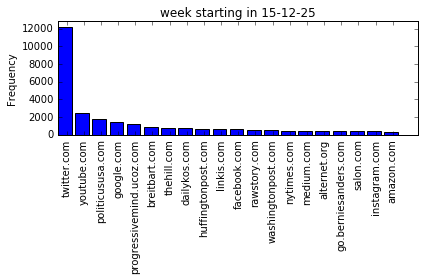

[0.8600607133346148, 0.7378696447552888, 0.8466810434782609, 0.7024506800758062, 0.6843167473946866, 0.7851517075866165, 0.7682172151157114, 0.7636759621881539, 0.7044018205461638, 0.7040369517713368, 0.6631961005952343, 0.7671537380275244, 0.6975429466899263, 0.7024566021181926, 0.8658942173586525, 0.7401064183571666, 0.761836749268014, 0.6935365709559258, 0.5090159678394972, 0.7405197149040867]


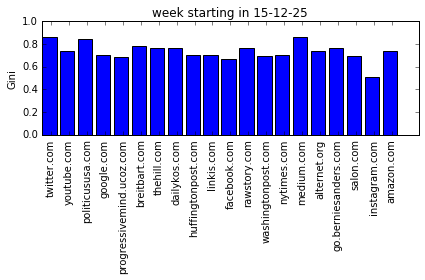

['twitter.com', 'youtube.com', 'politicususa.com', 'washingtonpost.com', 'breitbart.com', 'google.com', 'progressivemind.ucoz.com', 'huffingtonpost.com', 'linkis.com', 'facebook.com', 'thinkprogress.org', 'thehill.com', 'nytimes.com', 'rawstory.com', 'reddit.com', 'thegatewaypundit.com', 'usa.gov', 'amp.twimg.com', 'alternet.org', 'infowars.com']
[17159, 3719, 2452, 1328, 1281, 1189, 1152, 1142, 1138, 957, 901, 798, 760, 729, 609, 556, 500, 500, 486, 455]
['feelthebern', 'uniteblue', 'p2', 'blacklivesmatter', 'tcot', 'bernie2016', 'lgbt', 'hillary', 'sabesquetequierecuando', 'gunsense', 'hillaryclinton', 'nedtsj', 'berniesanders', 'givetwitteraslogan', 'weareperfectday2', 'imwithher', 'ainf', 'stoprush', 'hillary2016', 'tpp']
[13917, 11489, 9688, 7876, 6834, 6373, 5327, 5311, 4862, 4350, 4179, 4108, 3902, 3027, 2744, 2682, 2510, 2408, 2407, 2398]


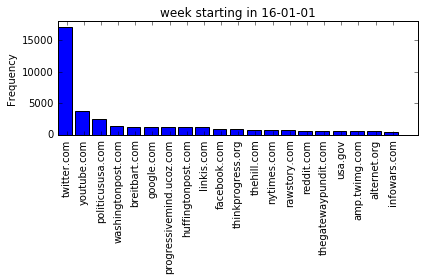

[0.870706223140676, 0.7945180468544955, 0.8808647919876733, 0.8207681879169617, 0.8170480404551201, 0.681542631005927, 0.6710807161214445, 0.760902464072177, 0.7949684116872061, 0.6882964896516487, 0.8013415361823831, 0.8033133299725845, 0.742468797612751, 0.7970177420046607, 0.793186490455213, 0.7494724286631801, 0.6018394067988583, 0.7889148439159057, 0.7786300261192657, 0.7042580721049226]


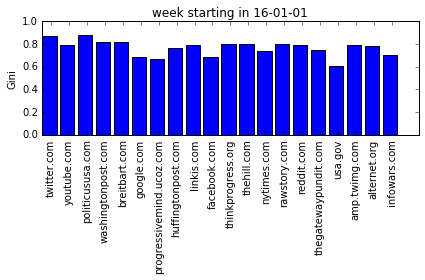

['twitter.com', 'youtube.com', 'politicususa.com', 'linkis.com', 'huffingtonpost.com', 'washingtonpost.com', 'nytimes.com', 'progressivemind.ucoz.com', 'politico.com', 'facebook.com', 'breitbart.com', 'pinterest.com', 'google.com', 'thehill.com', 'infowars.com', 'reddit.com', 'act.credoaction.com', 'dailykos.com', 'rawstory.com', 'thinkprogress.org']
[20523, 4291, 2628, 1710, 1519, 1466, 1165, 1127, 1088, 1088, 1054, 1037, 954, 939, 900, 890, 693, 671, 591, 591]
['feelthebern', 'uniteblue', 'p2', 'bernie2016', 'tcot', 'hillary', 'lgbt', 'blacklivesmatter', 'berniesanders', 'hillaryclinton', 'sabesquetequierecuando', 'tpp', 'nedtsj', 'imwithher', 'ainf', 'tntvote', 'gunsense', 'hillary2016', 'weareperfectday2', 'stoprush']
[21349, 12472, 11064, 7572, 6877, 6743, 6417, 5290, 4950, 4877, 4862, 4508, 4108, 3918, 3688, 3311, 3099, 2744, 2744, 2345]


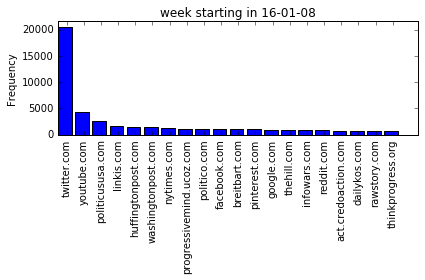

[0.8759911931013664, 0.8015546672985197, 0.86950280099447, 0.817614510274394, 0.806799333203078, 0.7648557844457692, 0.7767644504818977, 0.6064084170253468, 0.763880613483394, 0.7069315072080448, 0.8204640865857659, 0.9121959237343853, 0.6678913981678376, 0.7564005265490886, 0.6984313349627003, 0.8938369850398763, 0.8719347808539833, 0.7555078861738067, 0.7851261204919742, 0.7130711948230196]


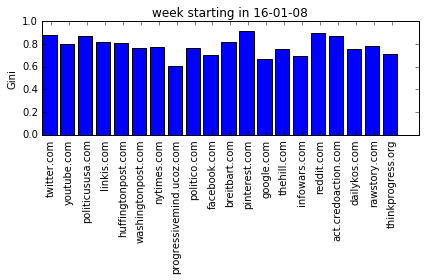

['twitter.com', 'youtube.com', 'vine.co', 'amp.twimg.com', 'nytimes.com', 'politicususa.com', 'linkis.com', 'google.com', 'cnn.com', 'thehill.com', 'washingtonpost.com', 'facebook.com', 'huffingtonpost.com', 'breitbart.com', 'theintercept.com', 'nbcnews.com', 'politico.com', 'reddit.com', 'politifact.com', 'progressivemind.ucoz.com']
[28719, 8438, 4481, 4201, 2873, 2553, 2056, 1903, 1763, 1744, 1689, 1557, 1459, 1441, 1437, 1314, 1258, 1215, 1038, 973]
['demdebate', 'feelthebern', 'uniteblue', 'p2', 'blacklivesmatter', 'bernie2016', 'lgbt', 'tcot', 'berniesanders', 'imwithher', 'hillary', 'sabesquetequierecuando', 'nedtsj', 'ainf', 'hillary2016', 'tntvote', 'hillaryclinton', 'tpp', 'weareperfectday2', 'debatewithbernie']
[45766, 24478, 11946, 9545, 7895, 7733, 6896, 6884, 6857, 6689, 5872, 4862, 4108, 3972, 3928, 3440, 3368, 3364, 2744, 2570]


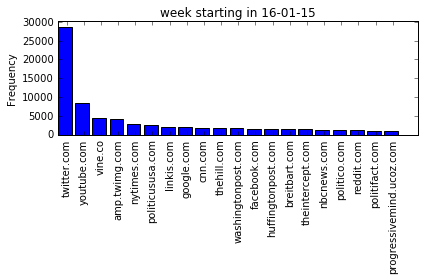

[0.8865078004225033, 0.8462046075523152, 0.91898087508975, 0.9252628376824282, 0.8353055031036247, 0.8570463181963351, 0.8250185383406153, 0.7009995555987613, 0.8347233354273624, 0.7965711638428956, 0.7641458914572055, 0.7373979023705116, 0.7632172201496807, 0.8323295454545454, 0.863953081232493, 0.8379008746355685, 0.791228852236303, 0.8913409935324068, 0.8739153439153439, 0.5843579234972678]


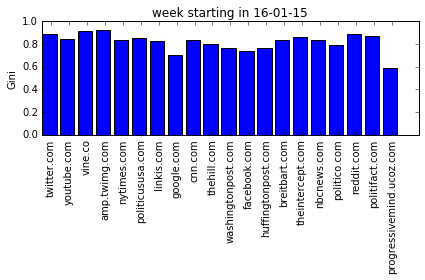

['twitter.com', 'youtube.com', 'politicususa.com', 'linkis.com', 'hillaryclinton.com', 'facebook.com', 'google.com', 'cms.fightforthefuture.org', 'reddit.com', 'washingtonpost.com', 'ebay.com', 'cnn.com', 'amp.twimg.com', 'instagram.com', 'huffingtonpost.com', 'nytimes.com', 'thehill.com', 'progressivemind.ucoz.com', 'infowars.com', 'amazon.com']
[24646, 6842, 2270, 2248, 1976, 1858, 1670, 1574, 1271, 1268, 1211, 1186, 1148, 1090, 1087, 1017, 1013, 816, 790, 705]
['feelthebern', 'uniteblue', 'imwithher', 'p2', 'bernie2016', 'lgbt', 'berniesanders', 'tcot', 'tpp', 'wearebernie', 'blacklivesmatter', 'hillary', 'sabesquetequierecuando', 'nedtsj', 'hillaryclinton', 'ainf', 'tntvote', 'hillary2016', 'demtownhall', 'weareperfectday2']
[26871, 12436, 10791, 9823, 8471, 8296, 6616, 6567, 6389, 6304, 6297, 5179, 4862, 4108, 3702, 3695, 3451, 3424, 3233, 2744]


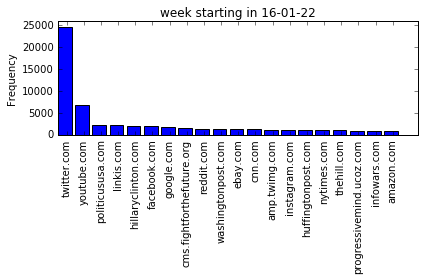

[0.8846062287415406, 0.8270988552196099, 0.8612736044160058, 0.8459498480916233, 0.9016408902301019, 0.794603768518207, 0.6872475957306032, 0.7967109424414928, 0.8944928716904277, 0.7648669867167196, 0.7982384107288985, 0.7749450978025192, 0.8049540682414699, 0.6774742815407684, 0.739688024775744, 0.7468141490955179, 0.7356967586179601, 0.6998304408537802, 0.6875710157827836, 0.840618454291288]


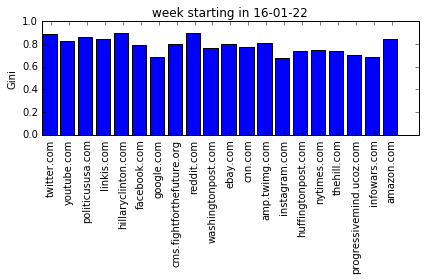

['twitter.com', 'youtube.com', 'hillaryclinton.com', 'facebook.com', 'linkis.com', 'washingtonpost.com', 'huffingtonpost.com', 'google.com', 'ebay.com', 'politicususa.com', 'nytimes.com', 'fightthetpp.org', 'amp.twimg.com', 'progressivemind.ucoz.com', 'reddit.com', 'thehill.com', 'youthdebates.org', 'politico.com', 'instagram.com', 'infowars.com']
[32359, 7277, 2800, 2373, 2091, 1840, 1752, 1665, 1564, 1416, 1413, 1324, 1280, 1217, 1195, 984, 983, 916, 903, 868]
['feelthebern', 'imwithher', 'tpp', 'uniteblue', 'p2', 'bernie2016', 'berniesanders', 'lgbt', 'iowacaucus', 'hillary', 'notmeus', 'tcot', 'blacklivesmatter', 'hillaryclinton', 'sabesquetequierecuando', 'wearebernie', 'hillary2016', 'nedtsj', 'iacaucus', 'caucusforbernie']
[34164, 16007, 11775, 11353, 10295, 9408, 8592, 7707, 7592, 7342, 7147, 6813, 6464, 5911, 4862, 4432, 4386, 4108, 3963, 3801]


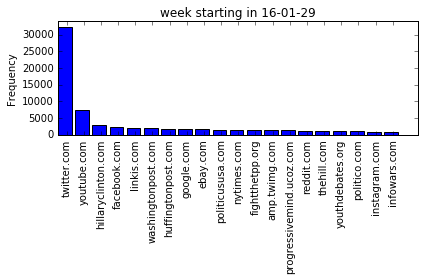

[0.9054344803637134, 0.8299198756113496, 0.9286693191865606, 0.7960741340702273, 0.8403148271293471, 0.7911327959270259, 0.7801177775771101, 0.7038596563123242, 0.8240192730859701, 0.8249554656667356, 0.7700214101387721, 0.49698795180722893, 0.8005199354946338, 0.755161393416427, 0.8852413793103449, 0.7475598444688785, 0.7732546705998034, 0.7503563922813515, 0.6237759111395245, 0.6640122735242548]


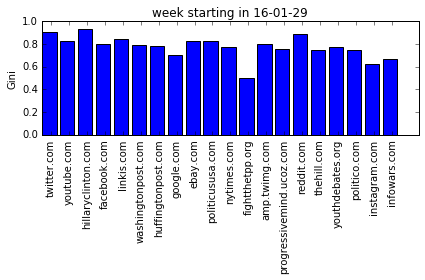

['twitter.com', 'youtube.com', 'linkis.com', 'cnn.com', 'amp.twimg.com', 'washingtonpost.com', 'msnbc.com', 'huffingtonpost.com', 'facebook.com', 'nytimes.com', 'hillaryclinton.com', 'politico.com', 'instagram.com', 'google.com', 'theintercept.com', 'ebay.com', 'thehill.com', 'progressivemind.ucoz.com', 'salon.com', 'politicususa.com']
[36418, 7805, 2758, 2618, 2537, 2438, 2145, 1919, 1897, 1821, 1817, 1757, 1747, 1714, 1711, 1517, 1506, 1280, 1058, 991]
['feelthebern', 'demdebate', 'imwithher', 'p2', 'uniteblue', 'bernie2016', 'blacklivesmatter', 'berniesanders', 'tpp', 'lgbt', 'tcot', 'hillary', 'nhprimary', 'hillaryclinton', 'sabesquetequierecuando', 'notmeus', 'nedtsj', 'hillary2016', 'ainf', 'tntvote']
[36786, 26812, 15555, 10641, 10400, 9601, 9575, 9558, 7519, 7397, 6675, 6576, 6191, 5623, 4862, 4170, 4108, 4016, 3966, 3935]


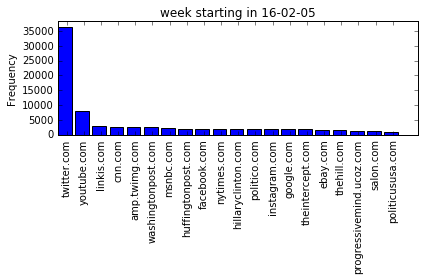

[0.8985865024580091, 0.8141685245166967, 0.8516914120362397, 0.8774425690782974, 0.8574991739237026, 0.8222660098522168, 0.8660164452066871, 0.7859803894684473, 0.7470982585195783, 0.8181359059815955, 0.8735327578130229, 0.8251299463447351, 0.7954246855363115, 0.703840957308565, 0.8930698725105809, 0.7507975654730124, 0.796133030502995, 0.6572291582762787, 0.7447954667055791, 0.8087264608813822]


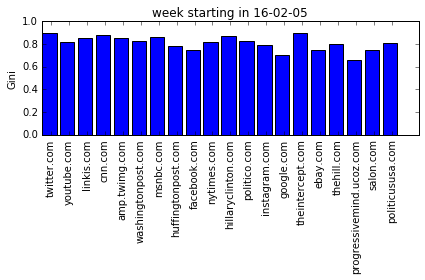

['twitter.com', 'youtube.com', 'amp.twimg.com', 'washingtonpost.com', 'cnn.com', 'linkis.com', 'hillaryclinton.com', 'ebay.com', 'huffingtonpost.com', 'facebook.com', 'google.com', 'nytimes.com', 'thehill.com', 'go.berniesanders.com', 'movietvtechgeeks.com', 'politico.com', 'progressivemind.ucoz.com', 'dailykos.com', 'slate.com', 'dailycaller.com']
[34866, 8096, 3565, 2831, 2731, 2613, 2293, 2029, 2011, 1843, 1681, 1325, 1266, 1250, 1231, 1213, 1207, 1161, 1129, 1125]
['feelthebern', 'demdebate', 'imwithher', 'uniteblue', 'p2', 'blacklivesmatter', 'bernie2016', 'berniesanders', 'lgbt', 'tcot', 'hillaryclinton', 'hillary', 'sabesquetequierecuando', 'hillary2016', 'notmeus', 'nedtsj', 'tpp', 'ainf', 'tntvote', 'scprimary']
[34394, 33067, 16024, 11713, 10426, 9505, 9045, 7810, 7414, 7009, 6291, 5755, 4862, 4346, 4345, 4108, 3973, 3549, 3401, 3289]


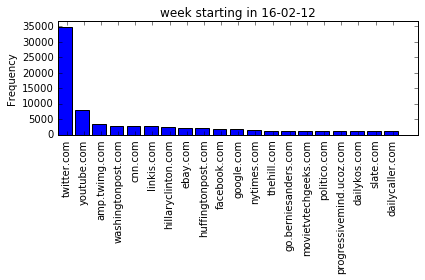

[0.8972204326909989, 0.8286106584585672, 0.907012939453125, 0.8860876053499004, 0.858473413852782, 0.8439402829944549, 0.8942521288411699, 0.7959335373452424, 0.7804394007155635, 0.762126148224803, 0.6955232040859295, 0.7718643963524778, 0.7639863114707606, 0.8627996810733531, 0.3327917682101273, 0.7653366497787762, 0.6827803864213686, 0.7578744331608865, 0.8409513338045499, 0.8005671213208901]


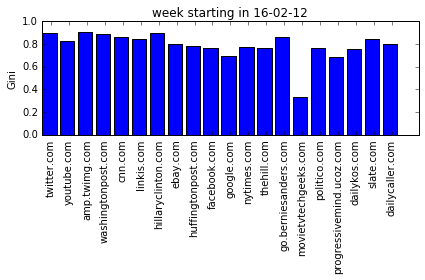

['twitter.com', 'youtube.com', 'linkis.com', 'huffingtonpost.com', 'washingtonpost.com', 'facebook.com', 'google.com', 'hillaryclinton.com', 'ebay.com', 'instagram.com', 'go.berniesanders.com', 'progressivemind.ucoz.com', 'thehill.com', 'nytimes.com', 'dailykos.com', 'politico.com', 'thinkprogress.org', 'reddit.com', 'voteforclintons.com', 'cnn.com']
[42002, 9199, 2483, 2295, 1752, 1744, 1600, 1455, 1452, 1298, 1296, 1240, 1158, 1092, 1074, 968, 946, 914, 904, 872]
['feelthebern', 'imwithher', 'uniteblue', 'berniesanders', 'blacklivesmatter', 'p2', 'bernie2016', 'lgbt', 'hillaryclinton', 'hillary', 'demtownhall', 'tcot', 'hillary2016', 'sabesquetequierecuando', 'scprimary', 'nvcaucus', 'nedtsj', 'notmeus', 'tpp', 'whichhillary']
[38612, 19679, 11676, 11470, 10802, 9779, 8845, 8599, 7878, 7328, 6286, 5637, 5076, 4862, 4657, 4302, 4108, 4088, 3914, 3252]


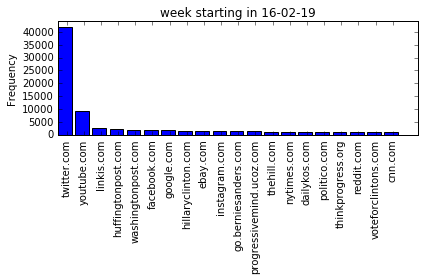

[0.9093795553566479, 0.8484584788341676, 0.8260929951690821, 0.7822863802667296, 0.7819725478743377, 0.7442947382776662, 0.7074654445328723, 0.872793297609009, 0.7436537744061684, 0.6579570861536691, 0.8525913313438583, 0.6086182336182336, 0.7735079828506799, 0.7313036320219938, 0.759386704716284, 0.7521242318551735, 0.7493955259400286, 0.8553114791033006, 0.7917648794702964, 0.7208410473419731]


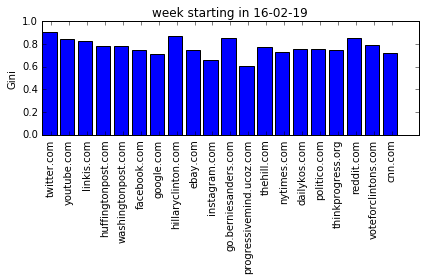

['twitter.com', 'youtube.com', 'amp.twimg.com', 'linkis.com', 'ebay.com', 'huffingtonpost.com', 'facebook.com', 'washingtonpost.com', 'instagram.com', 'google.com', 'hillaryclinton.com', 'go.berniesanders.com', 'nytimes.com', 'secure.actblue.com', 'cnn.com', 'progressivemind.ucoz.com', 'reddit.com', 'thehill.com', 'dailykos.com', 'politico.com']
[45461, 9514, 2488, 2451, 2356, 2205, 2173, 2027, 1929, 1656, 1592, 1481, 1448, 1405, 1397, 1359, 1164, 1144, 1077, 1009]
['feelthebern', 'berniesanders', 'imwithher', 'supertuesday', 'uniteblue', 'bernie2016', 'blacklivesmatter', 'p2', 'hillary', 'hillaryclinton', 'lgbt', 'whichhillary', 'tcot', 'hillary2016', 'sabesquetequierecuando', 'notmeus', 'nedtsj', 'blm', 'tpp', 'bernieorbust']
[46675, 19202, 18689, 13710, 11540, 11035, 10671, 10099, 9508, 7846, 7761, 5684, 5638, 5308, 4862, 4291, 4108, 3805, 3646, 3042]


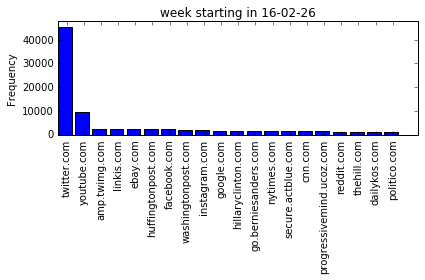

[0.9005778778467229, 0.8369616875701781, 0.8451206446284681, 0.8067492364067135, 0.778370510958627, 0.7909654159654159, 0.7605200858234403, 0.7765524994244443, 0.6952826943516266, 0.70924905632247, 0.8743771461630337, 0.8601607468353939, 0.7742215532071762, 0.8937359163982276, 0.8396607751446461, 0.6127691165553081, 0.8606673114119923, 0.7711840945915371, 0.7552942241886761, 0.7442074054977281]


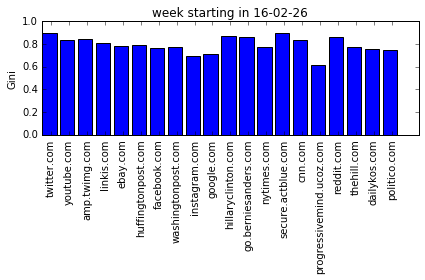

['twitter.com', 'youtube.com', 'cnn.com', 'amp.twimg.com', 'go.berniesanders.com', 'linkis.com', 'washingtonpost.com', 'huffingtonpost.com', 'ebay.com', 'thehill.com', 'theintercept.com', 'facebook.com', 'hillaryclinton.com', 'vine.co', 'google.com', 'politifact.com', 'reddit.com', 'instagram.com', 'abcnews.go.com', 'nytimes.com']
[60775, 10975, 4856, 4350, 3387, 3314, 2751, 2706, 2643, 2421, 2297, 2172, 1970, 1918, 1851, 1787, 1621, 1556, 1553, 1462]
['demdebate', 'feelthebern', 'imwithher', 'berniesanders', 'bernie2016', 'uniteblue', 'p2', 'lgbt', 'michiganprimary', 'hillary', 'hillaryclinton', 'blacklivesmatter', 'hillary2016', 'tcot', 'notmeus', 'sabesquetequierecuando', 'nedtsj', 'miprimary', 'tpp', 'ainf']
[64580, 54820, 18377, 16484, 14272, 11781, 10792, 7760, 7590, 7105, 6974, 6065, 5951, 5709, 5258, 4862, 4108, 4081, 4027, 3538]


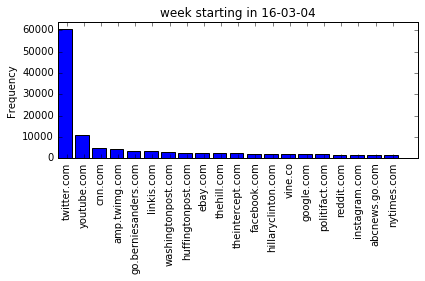

[0.9196020576426409, 0.8341771765119281, 0.9129466756681328, 0.8996436924825671, 0.8887198055813802, 0.8291253859966068, 0.8316467616842345, 0.8127512144702842, 0.8035658791599621, 0.8302671895292976, 0.8765151781322466, 0.7597534858336805, 0.8696879785604901, 0.8602372058196921, 0.7191243709088517, 0.8889298456385613, 0.874877217718247, 0.6725498862178577, 0.8655032239977573, 0.7557288548521949]


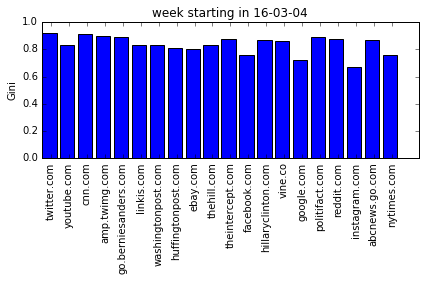

['twitter.com', 'youtube.com', 'go.berniesanders.com', 'amp.twimg.com', 'linkis.com', 'facebook.com', 'ebay.com', 'huffingtonpost.com', 'livefreefun.net', 'instagram.com', 'washingtonpost.com', 'google.com', 'reddit.com', 'nytimes.com', 'politico.com', 'progressivemind.ucoz.com', 'hillaryclinton.com', 'thehill.com', 'infowars.com', 'dailykos.com']
[45360, 10483, 4492, 3144, 2673, 2630, 2367, 1886, 1805, 1649, 1638, 1624, 1465, 1452, 1424, 1297, 1225, 1132, 1111, 1099]
['feelthebern', 'imwithher', 'berniesanders', 'bernie2016', 'uniteblue', 'hillary', 'p2', 'lgbt', 'blacklivesmatter', 'hillaryclinton', 'tcot', 'hillary2016', 'bernieorbust', 'blm', 'sabesquetequierecuando', 'notmeus', 'nedtsj', 'stillsanders', 'tpp', 'ainf']
[50509, 19342, 12074, 11877, 10465, 10104, 9914, 9693, 9237, 6514, 5973, 5468, 5020, 4965, 4862, 4194, 4108, 3907, 3808, 3642]


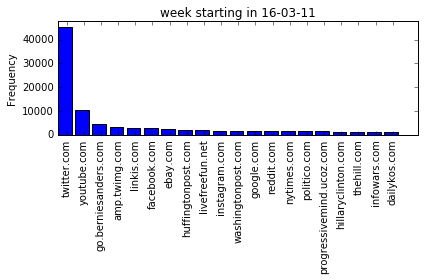

[0.9081892104866419, 0.842232264618707, 0.8939097128913188, 0.8193489292501812, 0.8100429869994179, 0.7812697185188386, 0.7451960909598402, 0.7838895629099544, 0.39202177544214023, 0.6734173494684145, 0.7739830967587911, 0.7185970475562077, 0.8922238648737175, 0.7547568528613016, 0.7836863290047439, 0.6252786767349874, 0.8402776810382856, 0.7708338369164278, 0.710434291753308, 0.7506302058370143]


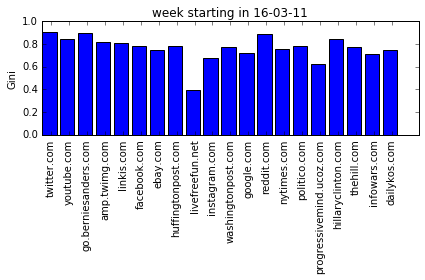

['twitter.com', 'youtube.com', 'ebay.com', 'linkis.com', 'go.berniesanders.com', 'google.com', 'huffingtonpost.com', 'livefreefun.net', 'facebook.com', 'washingtonpost.com', 'thehill.com', 'politico.com', 'instagram.com', 'usuncut.com', 'progressivemind.ucoz.com', 'breitbart.com', 'wikileaks.org', 'hillaryclinton.com', 'dailykos.com', 'politicususa.com']
[38770, 7734, 2470, 2454, 2414, 1885, 1855, 1831, 1705, 1552, 1294, 1175, 1130, 1047, 1011, 907, 891, 867, 864, 860]
['feelthebern', 'imwithher', 'berniesanders', 'stillsanders', 'lgbt', 'p2', 'bernie2016', 'uniteblue', 'hillary', 'blacklivesmatter', 'hillaryclinton', 'tcot', 'bernieorbust', 'sabesquetequierecuando', 'azprimary', 'nedtsj', 'hillary2016', 'ofthepeople', 'ainf', 'notmeus']
[39533, 16068, 10547, 10537, 10135, 10034, 9586, 8516, 6999, 6599, 6038, 6001, 5801, 4862, 4665, 4108, 3770, 3635, 3489, 3280]


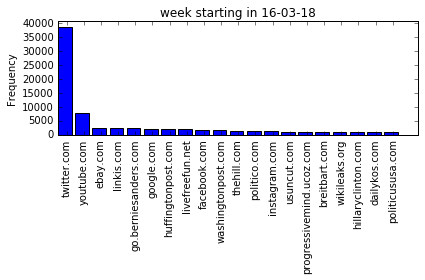

[0.9075034916549739, 0.8176211099743256, 0.719869345013825, 0.8119544594129641, 0.8607784431137725, 0.7048618892769205, 0.795103440825366, 0.44667603483571006, 0.7233575449983616, 0.7744893964351931, 0.7749766817017485, 0.7939563321188031, 0.6310760021109915, 0.7840815893775396, 0.5804123711340207, 0.7844780036703267, 0.8661649758855813, 0.8188137755102041, 0.7182973159406563, 0.7775775834908633]


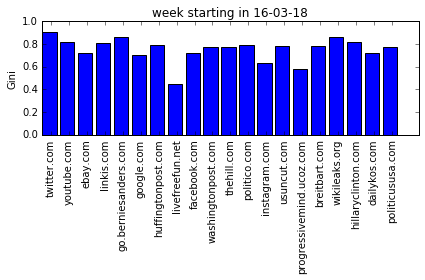

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'linkis.com', 'go.berniesanders.com', 'facebook.com', 'ebay.com', 'google.com', 'thehill.com', 'amp.twimg.com', 'washingtonpost.com', 'instagram.com', 'nytimes.com', 'socialisttimes.com', 'politico.com', 'hillaryclinton.com', 'dailykos.com', 'usuncut.com', 'politicususa.com', 'thinkprogress.org']
[39088, 7584, 2723, 2670, 2267, 1941, 1884, 1598, 1594, 1581, 1243, 1228, 999, 999, 940, 906, 843, 754, 700, 699]
['feelthebern', 'imwithher', 'berniesanders', 'p2', 'lgbt', 'bernie2016', 'uniteblue', 'bernieorbust', 'hillary', 'birdiesanders', 'hillaryclinton', 'blacklivesmatter', 'sabesquetequierecuando', 'stillsanders', 'tcot', 'nedtsj', 'hillary2016', 'wacaucus', 'tonedownforwhat', 'tpp']
[44775, 16185, 12309, 9489, 9230, 8543, 7953, 6661, 6292, 6152, 5919, 5163, 4862, 4856, 4820, 4108, 4073, 3777, 3411, 3221]


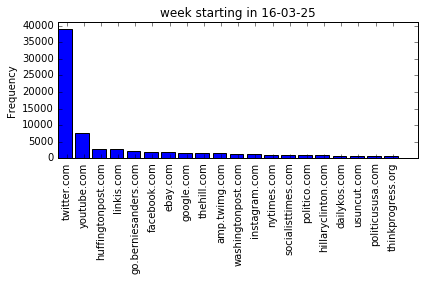

[0.8977092979019016, 0.8054024799507686, 0.821671012910581, 0.8359353081381291, 0.8535768616140627, 0.7492642687277051, 0.7319481854040875, 0.7055891776432894, 0.8173614902956339, 0.7969879155722702, 0.7542445180885409, 0.6400827991541381, 0.7270679660136189, 0.668534738228515, 0.7674825174825175, 0.808571040478131, 0.719846735269217, 0.7558474240308874, 0.8186875600733988, 0.7319711024665498]


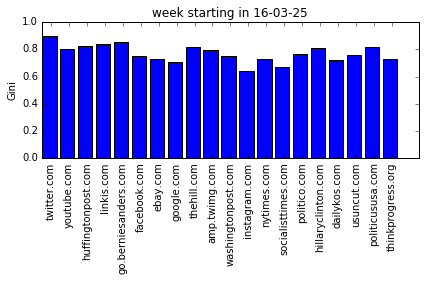

['twitter.com', 'youtube.com', 'huffingtonpost.com', 'go.berniesanders.com', 'facebook.com', 'bluenationreview.com', 'linkis.com', 'washingtonpost.com', 'usuncut.com', 'thehill.com', 'ebay.com', 'amp.twimg.com', 'instagram.com', 'google.com', 'socialisttimes.com', 'cnn.com', 'livefreefun.net', 'salon.com', 'nytimes.com', 'dailykos.com']
[44219, 11195, 2974, 2223, 1887, 1840, 1811, 1792, 1620, 1405, 1239, 1214, 1184, 1126, 1115, 1060, 1051, 1018, 990, 915]
['feelthebern', 'imwithher', 'berniesanders', 'lgbt', 'p2', 'bernie2016', 'hillary', 'hillaryclinton', 'wiprimary', 'uniteblue', 'blacklivesmatter', 'bernieorbust', 'nyprimary', 'hillary2016', 'sabesquetequierecuando', 'nedtsj', 'tpp', 'tcot', 'bernie', 'imsosick']
[48396, 23722, 14306, 10145, 9479, 8596, 8276, 7343, 7235, 6780, 6063, 6048, 5591, 5474, 4862, 4108, 4014, 3806, 3060, 2958]


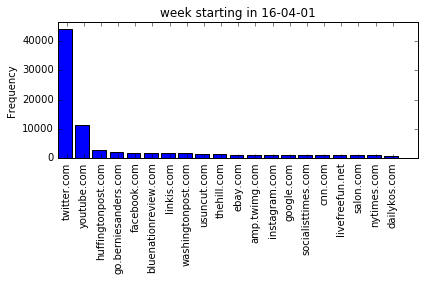

[0.902967154409888, 0.8543823398887708, 0.8324670240471875, 0.8591778274834639, 0.7374297312663605, 0.8576647583958088, 0.7851230808817222, 0.7811723678906565, 0.8210900758402984, 0.8317016873607131, 0.7910158798700759, 0.7191106244487028, 0.6682115295570304, 0.7106187524431786, 0.7489083820662769, 0.7677137625017608, 0.41021815979097165, 0.7619463869463869, 0.7254425455050716, 0.7352644994566392]


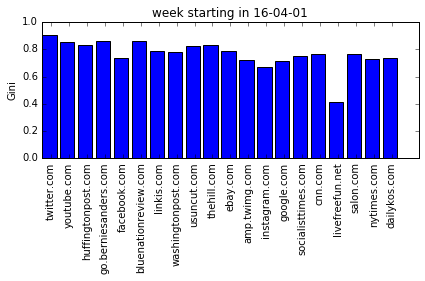

['twitter.com', 'youtube.com', 'ebay.com', 'amp.twimg.com', 'huffingtonpost.com', 'go.berniesanders.com', 'linkis.com', 'washingtonpost.com', 'facebook.com', 'nytimes.com', 'thehill.com', 'salon.com', 'bluenationreview.com', 'cnn.com', 'instagram.com', 'dailykos.com', 'usuncut.com', 'google.com', 'socialisttimes.com', 'progressivemind.ucoz.com']
[41243, 9637, 2608, 2368, 2349, 2118, 2064, 2044, 1981, 1829, 1771, 1377, 1343, 1246, 1158, 1097, 1069, 1049, 1037, 994]
['feelthebern', 'imwithher', 'berniesanders', 'nyprimary', 'lgbt', 'p2', 'blacklivesmatter', 'bernie2016', 'hillaryclinton', 'hillary', 'uniteblue', 'sabesquetequierecuando', 'demdebate', 'bernieorbust', 'tpp', 'nedtsj', 'tcot', 'hillary2016', 'notmeus', 'blm']
[45649, 21075, 14962, 13441, 10436, 9607, 8810, 8040, 7282, 6652, 6189, 4862, 4642, 4507, 4123, 4108, 3997, 3847, 3548, 3268]


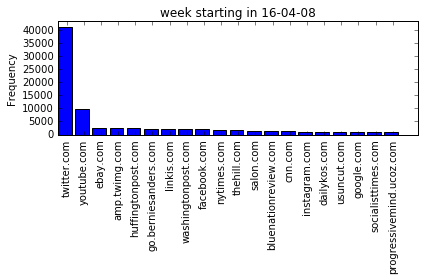

[0.9036152693570466, 0.8380058036682312, 0.8018512967058669, 0.7769774099770452, 0.8231287136469368, 0.8795544746501149, 0.7909790048683485, 0.842647340530832, 0.7436729470804879, 0.7881388628276595, 0.8324427725370919, 0.7617921850876397, 0.8304259359739555, 0.7775653923541247, 0.7131670730509891, 0.7384166145228093, 0.790193504364788, 0.7026496181676936, 0.7306178669815033, 0.6045209456656989]


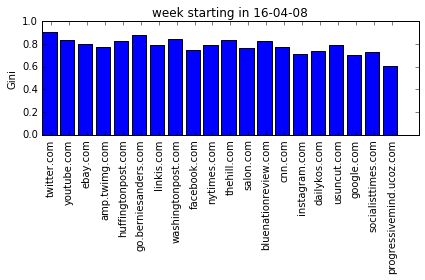

['twitter.com', 'youtube.com', 'cnn.com', 'amp.twimg.com', 'hillaryclinton.com', 'ebay.com', 'huffingtonpost.com', 'go.berniesanders.com', 'facebook.com', 'thehill.com', 'linkis.com', 'theintercept.com', 'washingtonpost.com', 'instagram.com', 'politifact.com', 'bluenationreview.com', 'nytimes.com', 'salon.com', 'dailykos.com', 'medium.com']
[52614, 11717, 5382, 5163, 2973, 2587, 2474, 2443, 2194, 2178, 2171, 2049, 1928, 1693, 1367, 1341, 1299, 1236, 1234, 1190]
['feelthebern', 'demdebate', 'imwithher', 'nyprimary', 'berniesanders', 'hillary', 'lgbt', 'p2', 'hillaryclinton', 'bernie2016', 'uniteblue', 'bernieorbust', 'sabesquetequierecuando', 'hillary2016', 'blacklivesmatter', 'bernie', 'nedtsj', 'tcot', 'tpp', 'primaryday']
[48317, 43463, 24359, 22527, 16010, 9257, 9104, 8455, 8130, 7707, 6409, 5964, 4862, 4587, 4166, 4150, 4108, 3990, 3727, 3342]


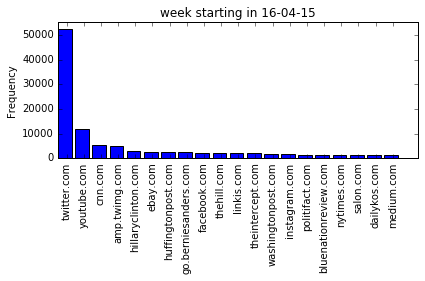

[0.9134769175617816, 0.854344370970087, 0.913626327724072, 0.8480605899501911, 0.8957760774851726, 0.7768969273533168, 0.8001931242746092, 0.8669001880074363, 0.7619434440988705, 0.8323489941484131, 0.7865991889247703, 0.9164432163761813, 0.8064275464183214, 0.6853268495092341, 0.8985626975763962, 0.8511873135243389, 0.7516747409020832, 0.7658812960978377, 0.7607335490830637, 0.7996828644501279]


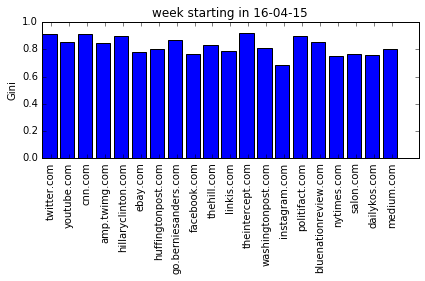

['twitter.com', 'youtube.com', 'amp.twimg.com', 'go.berniesanders.com', 'ebay.com', 'linkis.com', 'huffingtonpost.com', 'facebook.com', 'thehill.com', 'google.com', 'politico.com', 'instagram.com', 'dailykos.com', 'bluenationreview.com', 'salon.com', 'progressivemind.ucoz.com', 'hillaryclinton.com', 'politicususa.com', 'socialisttimes.com', 'inquisitr.com']
[37782, 8558, 3961, 3104, 2279, 2089, 1777, 1559, 1315, 1138, 1093, 1087, 1037, 998, 930, 928, 913, 909, 895, 880]
['feelthebern', 'imwithher', 'bernieorbust', 'berniesanders', 'lgbt', 'p2', 'uniteblue', 'hillary', 'hillaryclinton', 'bernie2016', 'stillsanders', 'paprimary', 'blacklivesmatter', 'sabesquetequierecuando', 'nedtsj', 'hillary2016', 'neverhillary', 'tcot', 'tpp', 'ctprimary']
[39413, 18355, 12475, 10524, 9123, 8098, 7691, 7461, 7223, 6767, 5896, 5743, 5156, 4862, 4108, 3808, 3717, 3699, 3576, 3489]


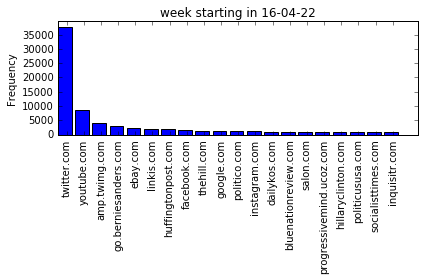

[0.9031817750331419, 0.8480058126562826, 0.8295599239036808, 0.9055111805940369, 0.708832447777825, 0.8037764504539221, 0.7764335729443907, 0.7213363295195332, 0.7836481498059494, 0.6715975179535095, 0.7671415265396935, 0.6562003963260142, 0.7354996699231787, 0.7924249877029022, 0.7483449858196914, 0.5910290237467019, 0.7930459187651049, 0.7823003334034181, 0.6952151573538857, 0.8084890824411782]


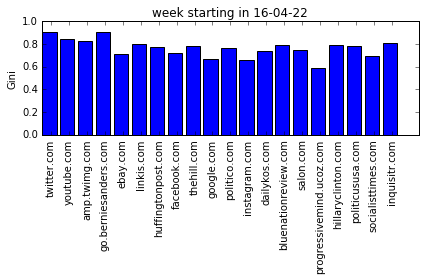

['twitter.com', 'youtube.com', 'hillaryclinton.com', 'ebay.com', 'amp.twimg.com', 'linkis.com', 'huffingtonpost.com', 'go.berniesanders.com', 'washingtonpost.com', 'bluenationreview.com', 'thehill.com', 'vine.co', 'facebook.com', 'google.com', 'salon.com', 'dailykos.com', 'politico.com', 'politicususa.com', 'berniesanders.com', 'instagram.com']
[34851, 6463, 3689, 2367, 2205, 2167, 1937, 1638, 1517, 1442, 1396, 1263, 1221, 1101, 949, 938, 925, 924, 920, 900]
['feelthebern', 'imwithher', 'bernieorbust', 'p2', 'berniesanders', 'lgbt', 'uniteblue', 'hillary', 'hillaryclinton', 'bernie2016', 'dropouthillary', 'inprimary', 'sabesquetequierecuando', 'hillary2016', 'neverhillary', 'tcot', 'nedtsj', 'indianaprimary', 'tpp', 'stillsanders']
[33320, 18071, 12210, 9462, 9111, 8774, 8563, 7403, 7229, 6646, 5419, 5228, 4862, 4856, 4463, 4291, 4108, 4072, 3870, 3288]


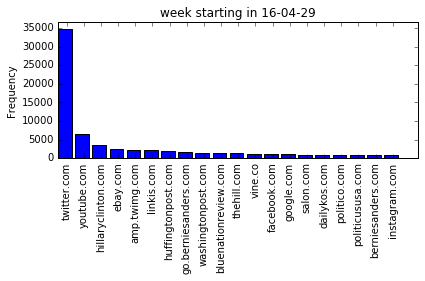

[0.8969109624938694, 0.8061448508963122, 0.917822221685379, 0.7433435597450285, 0.7857280283207634, 0.8337176649770353, 0.8046440924141157, 0.8883530708127483, 0.7599348636505098, 0.8298861508059402, 0.8145549598139054, 0.8267237123580714, 0.6874642876507218, 0.6600280688400195, 0.7683079740772049, 0.7330544702170771, 0.754282384093527, 0.8177380163463662, 0.7816956449743335, 0.5760088272383355]


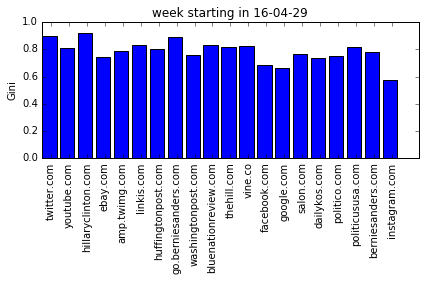

['twitter.com', 'youtube.com', 'amp.twimg.com', 'ebay.com', 'linkis.com', 'huffingtonpost.com', 'facebook.com', 'go.berniesanders.com', 'thehill.com', 'usuncut.com', 'washingtonpost.com', 'google.com', 'politico.com', 'bluenationreview.com', 'hillaryclinton.com', 'politicususa.com', 'vine.co', 'nytimes.com', 'amazon.com', 'instagram.com']
[32598, 7262, 3061, 2413, 2398, 2187, 1427, 1372, 1323, 1192, 1065, 1032, 1015, 950, 899, 884, 863, 827, 798, 779]
['feelthebern', 'imwithher', 'bernieorbust', 'p2', 'berniesanders', 'hillary', 'lgbt', 'dropouthillary', 'hillaryclinton', 'uniteblue', 'bernie2016', 'sabesquetequierecuando', 'tcot', 'hillary2016', 'nedtsj', 'neverhillary', 'blacklivesmatter', 'wvprimary', 'trump', 'tpp']
[32171, 14731, 11070, 9023, 8821, 8801, 8738, 8313, 8049, 7423, 5841, 4862, 4549, 4484, 4108, 3794, 3575, 3482, 3288, 3171]


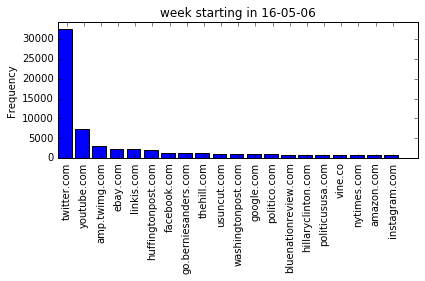

[0.8900728551537619, 0.8145496365456502, 0.8210572254650592, 0.7735328619251717, 0.836726710979464, 0.7976135634180418, 0.7168542023222316, 0.8543305545771203, 0.8015502576409966, 0.8259103620170826, 0.7264263864875649, 0.6730134895012138, 0.7683796933289834, 0.7852031425364758, 0.8168350168350168, 0.8166946768477585, 0.7712820216021472, 0.7423013564745848, 0.8077908080528419, 0.5829495665224873]


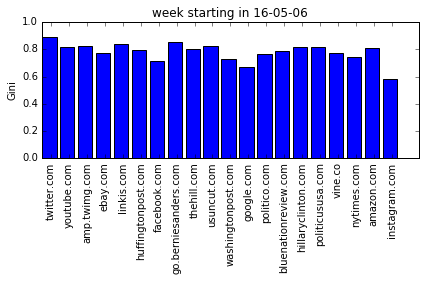

['twitter.com', 'youtube.com', 'amp.twimg.com', 'linkis.com', 'ebay.com', 'facebook.com', 'huffingtonpost.com', 'go.berniesanders.com', 'washingtonpost.com', 'thehill.com', 'amazon.com', 'cnn.com', 'google.com', 'hillaryclinton.com', 'instagram.com', 'bluenationreview.com', 'politicususa.com', 'dailykos.com', 'vine.co', 'salon.com']
[36235, 8057, 3553, 2300, 2151, 1849, 1799, 1784, 1540, 1139, 1103, 1076, 1019, 1003, 974, 921, 866, 837, 819, 749]
['feelthebern', 'imwithher', 'bernieorbust', 'lgbt', 'p2', 'berniesanders', 'uniteblue', 'hillary', 'hillaryclinton', 'dropouthillary', 'bernie2016', 'hillary2016', 'tcot', 'sabesquetequierecuando', 'kyprimary', 'nvdemconvention', 'neverhillary', 'nedtsj', 'blacklivesmatter', 'orprimary']
[33348, 16075, 13355, 10601, 8972, 8857, 7957, 7647, 6710, 5433, 5202, 5015, 4936, 4862, 4548, 4486, 4288, 4108, 3808, 3675]


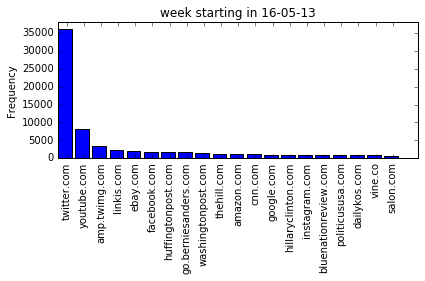

[0.8962719679546243, 0.8260018353415671, 0.7771887051001496, 0.8493927271888533, 0.755544766813534, 0.7461231727514942, 0.8242838150958912, 0.8664326690821256, 0.7946144818783782, 0.7582439801482752, 0.8071805265382166, 0.8482871722338395, 0.6760485651214128, 0.8263680882422859, 0.6160892603060758, 0.777376180007759, 0.8273850043761548, 0.6899900245673277, 0.8096265196428983, 0.7457096848401196]


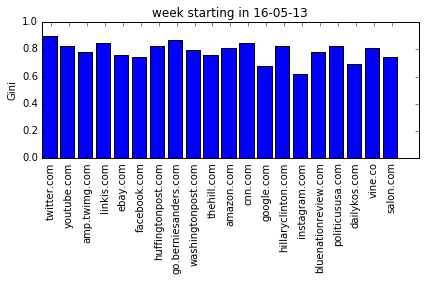

['twitter.com', 'youtube.com', 'amp.twimg.com', 'linkis.com', 'ebay.com', 'thehill.com', 'msnbc.com', 'go.berniesanders.com', 'huffingtonpost.com', 'washingtonpost.com', 'time.com', 'bluenationreview.com', 'facebook.com', 'google.com', 'politico.com', 'amazon.com', 'breitbart.com', 'vote.berniesanders.com', 'politicususa.com', 'nytimes.com']
[31829, 6552, 4591, 2486, 2359, 1626, 1600, 1511, 1503, 1454, 1247, 1176, 1124, 1112, 1052, 1006, 952, 944, 893, 824]
['feelthebern', 'imwithher', 'bernieorbust', 'p2', 'lgbt', 'hillary', 'berniesanders', 'hillaryclinton', 'uniteblue', 'blacklivesmatter', 'caprimary', 'hillary2016', 'bernie2016', 'sabesquetequierecuando', 'tcot', 'nedtsj', 'trump2016', 'neverhillary', 'dnc', 'tpp']
[32154, 15543, 11739, 9315, 8671, 8442, 7808, 7445, 7391, 5659, 5165, 5056, 5031, 4862, 4814, 4108, 3936, 3749, 3349, 3254]


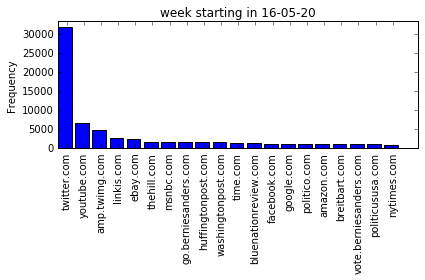

[0.888428214108331, 0.8034978234722124, 0.833271597187343, 0.8236826635588529, 0.7812585271704768, 0.8000088468825798, 0.9026425633879933, 0.8743285926384518, 0.7823645181696773, 0.7479362125068054, 0.8783979132483487, 0.8177796750683644, 0.7005790504292649, 0.6832026143790849, 0.7569433695615599, 0.8212987030217128, 0.7725149119507392, 0.8796911715340718, 0.8260567183229967, 0.7298603360615079]


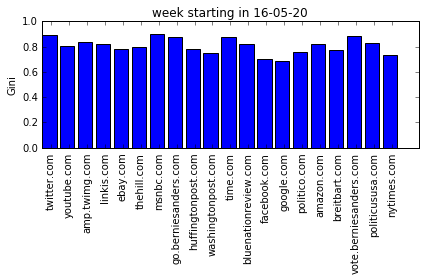

['twitter.com', 'youtube.com', 'amp.twimg.com', 'ebay.com', 'linkis.com', 'huffingtonpost.com', 'washingtonpost.com', 'go.berniesanders.com', 'bluenationreview.com', 'facebook.com', 'thehill.com', 'nytimes.com', 'paper.li', 'google.com', 'politico.com', 'politicususa.com', 'amazon.com', 'breitbart.com', 'dailykos.com', 'blogtalkradio.com']
[28689, 6142, 3991, 2175, 2134, 1427, 1285, 1206, 1170, 1166, 1166, 1142, 1066, 1024, 887, 882, 761, 756, 739, 719]
['feelthebern', 'imwithher', 'bernieorbust', 'p2', 'hillary', 'lgbt', 'berniesanders', 'hillaryclinton', 'uniteblue', 'caprimary', 'blacklivesmatter', 'sabesquetequierecuando', 'tcot', 'hillary2016', 'nedtsj', 'bernie2016', 'dropouthillary', 'neverhillary', 'weareperfectday2', 'tpp']
[26448, 14477, 9675, 8373, 8309, 8169, 7684, 6910, 6647, 5767, 5750, 4862, 4491, 4270, 4108, 3890, 3309, 2759, 2744, 2552]


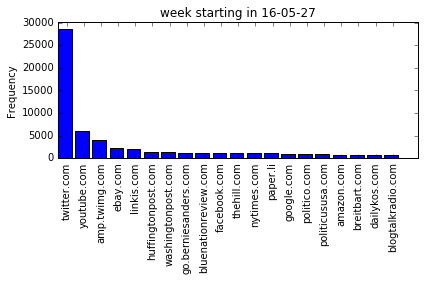

[0.8812716092013964, 0.8078551001678337, 0.8306795997244926, 0.7426930623699847, 0.7652231896415083, 0.7727054981158349, 0.7384142050895163, 0.847369595650145, 0.784327083014005, 0.7256080362528387, 0.7859543751673904, 0.8278059822861036, 0.7395029032538823, 0.6801400254591744, 0.7550023117033426, 0.823078129159055, 0.7525835866261398, 0.7647224171697538, 0.7245627450266419, 0.6969484951146463]


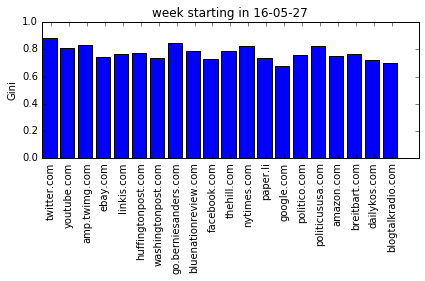

['twitter.com', 'youtube.com', 'amp.twimg.com', 'ebay.com', 'go.berniesanders.com', 'linkis.com', 'facebook.com', 'thehill.com', 'instagram.com', 'huffingtonpost.com', 'politico.com', 'breitbart.com', 'paper.li', 'bluenationreview.com', 'hillaryclinton.com', 'nytimes.com', 'washingtonpost.com', 'amazon.com', 'google.com', 'politicususa.com']
[41064, 8850, 2735, 2154, 2102, 2064, 1945, 1924, 1730, 1546, 1378, 1365, 1183, 1182, 1154, 1101, 1023, 1009, 997, 883]
['feelthebern', 'imwithher', 'bernieorbust', 'hillary', 'p2', 'hillaryclinton', 'berniesanders', 'caprimary', 'uniteblue', 'lgbt', 'tcot', 'blacklivesmatter', 'sabesquetequierecuando', 'bernie2016', 'neverhillary', 'hillary2016', 'nedtsj', 'dropouthillary', 'tpp', 'njprimary']
[33945, 26729, 13188, 10821, 10758, 9956, 9884, 9842, 7866, 7853, 5368, 4974, 4862, 4423, 4409, 4309, 4108, 3735, 3422, 3353]


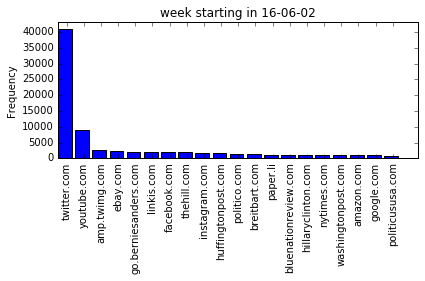

[0.8956971886868098, 0.8548769941987956, 0.7957012048192771, 0.7794162394492787, 0.8688971825970183, 0.7713992140221648, 0.7976471317333873, 0.8132014970991024, 0.6866945914516933, 0.7726676504344975, 0.7824053213174552, 0.8402450935506517, 0.7417543058849252, 0.801130174291939, 0.8528133872494192, 0.772407571633895, 0.7110419505347042, 0.7901742805859533, 0.6677974597956412, 0.8373136496145905]


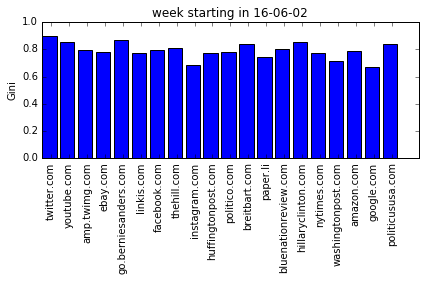

['twitter.com', 'youtube.com', 'amp.twimg.com', 'linkis.com', 'ebay.com', 'facebook.com', 'breitbart.com', 'huffingtonpost.com', 'instagram.com', 'washingtonpost.com', 'firmenpresse.de', 'thehill.com', 'aol.com', 'politico.com', 'paper.li', 'blogtalkradio.com', 'google.com', 'nytimes.com', 'amazon.com', 'politicususa.com']
[35423, 7737, 7497, 2514, 2226, 1989, 1698, 1599, 1510, 1492, 1321, 1152, 1017, 1002, 996, 995, 987, 914, 887, 829]
['feelthebern', 'lgbt', 'imwithher', 'bernieorbust', 'p2', 'hillaryclinton', 'hillary', 'uniteblue', 'orlando', 'berniesanders', 'blacklivesmatter', 'tcot', 'neverhillary', 'gunsense', 'sabesquetequierecuando', 'stillsanders', 'tpp', 'hillary2016', 'trump2016', 'nedtsj']
[23628, 20975, 15613, 15568, 11651, 11527, 9655, 9029, 6753, 6613, 6481, 6053, 5966, 4957, 4862, 4732, 4297, 4259, 4212, 4108]


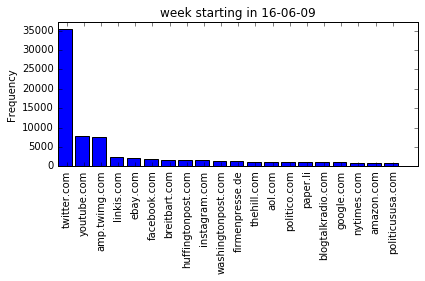

[0.8848102698729035, 0.8317021892196143, 0.8890232022295826, 0.7984856264579268, 0.7973790353043668, 0.7690082494823933, 0.8315146829788972, 0.7954389255364931, 0.7002716100395703, 0.8270239498798975, 0.6389905427631579, 0.7672758603623667, 0.8843818009867485, 0.7473731190477209, 0.7508110337853122, 0.6949474438604873, 0.6698597535219786, 0.7250809140153239, 0.808898694152045, 0.8232136538095108]


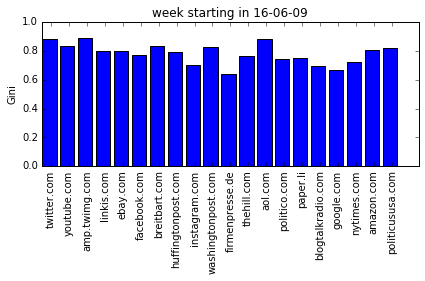

['twitter.com', 'youtube.com', 'amp.twimg.com', 'linkis.com', 'ebay.com', 'breitbart.com', 'trumprally.org', 'secure.actblue.com', 'facebook.com', 'washingtonpost.com', 'huffingtonpost.com', 'paper.li', 'google.com', 'guccifer2.wordpress.com', 'amazon.com', 'instagram.com', 'politicususa.com', 'nytimes.com', 'politico.com', 'thehill.com']
[25616, 5269, 2769, 2377, 2130, 1805, 1769, 1715, 1157, 1078, 1076, 1047, 999, 925, 917, 914, 892, 887, 825, 686]
['lgbt', 'feelthebern', 'bernieorbust', 'imwithher', 'p2', 'hillary', 'uniteblue', 'hillaryclinton', 'tcot', 'neverhillary', 'sabesquetequierecuando', 'gunsense', 'blacklivesmatter', 'nedtsj', 'dnc', 'berniesanders', 'trump', 'tpp', 'orlando', 'guccifer2']
[17566, 14535, 11808, 9765, 9444, 8787, 7473, 6718, 5711, 5197, 4862, 4785, 4598, 4108, 3973, 3834, 3825, 3644, 3567, 3047]


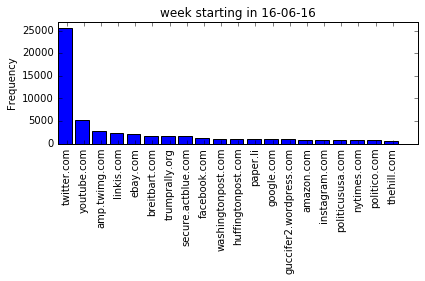

[0.8691852852032117, 0.7917710440693905, 0.7939991397849462, 0.7985311191459142, 0.7586455820438264, 0.8470475773373872, 0.0, 0.9114774543045325, 0.7015600603049503, 0.7318393716895836, 0.7717609279661505, 0.7702093554409714, 0.6607076094337752, 0.8340100422642055, 0.8118980265373477, 0.6814125421360434, 0.8377692341299314, 0.7405524215069067, 0.724517569124424, 0.736920283482981]


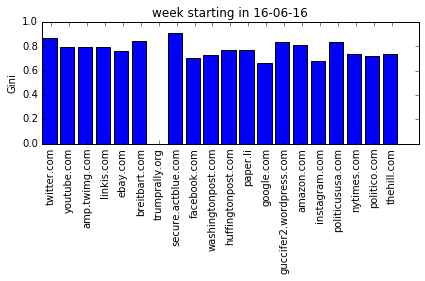

['twitter.com', 'youtube.com', 'amp.twimg.com', 'linkis.com', 'ebay.com', 'secure.actblue.com', 'trumprally.org', 'washingtonpost.com', 'huffingtonpost.com', 'breitbart.com', 'cdn.ampproject.org', 'instagram.com', 'facebook.com', 'cnn.com', 'paper.li', 'reddit.com', 'politicususa.com', 'aol.com', 'google.com', 'amazon.com']
[23336, 4365, 1845, 1800, 1594, 1567, 1444, 1381, 1258, 1162, 1128, 997, 945, 856, 841, 824, 777, 745, 703, 647]
['feelthebern', 'imwithher', 'lgbt', 'bernieorbust', 'p2', 'hillary', 'uniteblue', 'hillaryclinton', 'neverhillary', 'sabesquetequierecuando', 'tcot', 'nedtsj', 'berniesanders', 'tpp', 'blacklivesmatter', 'gunsense', 'stillsanders', 'weareperfectday2', 'nevertrump', 'dnc']
[12854, 12148, 11707, 11330, 8994, 8244, 6458, 6295, 4929, 4862, 4319, 4108, 3778, 3578, 3154, 3001, 2765, 2744, 2705, 2444]


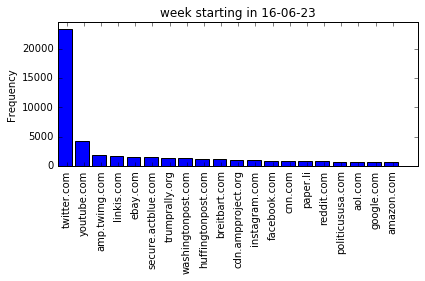

[0.8784533810515585, 0.7895571387364823, 0.7633081512005279, 0.7684717043523871, 0.7460478953766668, 0.9186638442872631, 0.0, 0.8246722734685364, 0.7941988557114799, 0.7899136494772805, 0.7348652614727855, 0.6463778505454538, 0.6712828069705393, 0.8512611003162537, 0.7474007670625202, 0.8241211536775664, 0.8174080290220689, 0.7612732095490716, 0.6723318713450293, 0.7307364557045]


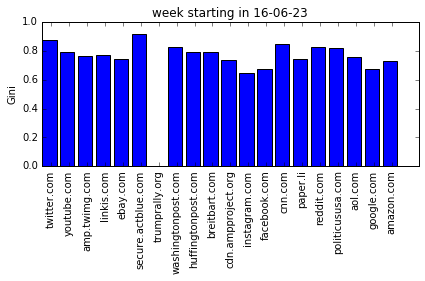

In [20]:

date_list = np.load('date_list' + '.npy')
print date_list

#We open up the relevant data on a week-by-week basis
for date in date_list:
    #the .item() is important to making these into dictionaries I guess
    url_dictionary = np.load('urlFreq' + output_name + date + '.npy').item()
    urls_and_tags = np.load('urlTags' + output_name + date + '.npy').item()
    total_hashtag_count_dictionary = np.load('HashFreq' + output_name + date + '.npy').item()


    #now, we want to find the top 20 urls in this week 
    #sorted takes a list, and returns a sorted list according to the 'key'
    # .items() on a dictionary converts a dictionary to a list of pairs, with 
    # entries like (key, value), and lambda t: t[1] says to look at the second entry
    # so the below two lines returns a list of the urls in descending order of frequency
    sorted_url_list = sorted(url_dictionary.items(), key = lambda t: t[1], reverse = True)
    sorted_url_list = map(lambda t: t[0], sorted_url_list)
    sorted_hashtag_list = sorted(total_hashtag_count_dictionary.items(), key = lambda t: t[1], reverse = True)
    sorted_hashtag_list = map(lambda t: t[0], sorted_hashtag_list)
    
    top_twenty_url = sorted_url_list[:20] #list of the top twenty urls this week
    top_twenty_url_count = [] #the url's corresponding frequencies this week
    for url in top_twenty_url:
        top_twenty_url_count.append(url_dictionary[url])
        
    top_twenty_hashtags = sorted_hashtag_list[:20] #Just added
    top_twenty_hashtags_count = [] #the hashtags's corresponding frequencies this week
    for Indiv_hashtag in top_twenty_hashtags:
        top_twenty_hashtags_count.append(total_hashtag_count_dictionary[Indiv_hashtag])

    print top_twenty_url
    print top_twenty_url_count
    print top_twenty_hashtags
    print top_twenty_hashtags_count



    #DARK PYPLOT MAGIC OOOOOOHHHHHH            
    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 


    ax.bar(range(20), top_twenty_url_count)
    ax.axis([0, 21, 0, max(top_twenty_url_count)*1.05]) #[min x, max x, min y, max y]


    ax.set_xticks(np.array(range(20))+0.5) #put where the tick-marks
    ax.set_xticklabels(top_twenty_url, fontsize = 10) #what to label the ticks
#             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
#             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('week starting in ' + date,  fontsize = 12)
#             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Frequency', fontsize = 10)  
#             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('urls' + output_name + date + '.png')    
    plt.show()
    plt.close()    





    Gini_List = []

    #now plotting Gini Index for each of the top twenty
    for url in top_twenty_url:

        single_url_tags = urls_and_tags[url] #dictionary of {tag:#}
        Gini = getGini(single_url_tags)
#                 tags_list = single_url_tags.keys() #list of [tag]
#                 #I _think_ this should be equivalent to single_
#                 tags_freq_list = [single_url_tags[tag] for tag in tags_list]


#                 denominator = 2*len(tags_list) * sum(tags_freq_list)
#                 numerator = 0
#                 for freq1 in tags_freq_list:
#                     for freq2 in tags_freq_list:
#                         numerator += abs(freq1 - freq2)

#                 Gini = float(numerator)/denominator
        Gini_List.append(Gini)


    print Gini_List

    #DARK PYPLOT MAGIC OOOOOOHHHHHH            
    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 


    ax.bar(range(20), Gini_List)
    ax.axis([0, 21, 0, 1.0]) #[min x, max x, min y, max y]


    ax.set_xticks(np.array(range(20))+0.5) #put where the tick-marks
    ax.set_xticklabels(top_twenty_url, fontsize = 10) #what to label the ticks
#             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
#             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('week starting in ' + date,  fontsize = 12)
#             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Gini', fontsize = 10)  
#             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('Gini' + output_name + date + '.png')    
    plt.show()
    plt.close()   




In [26]:
date_list = np.load('date_list' + '.npy')
total_url_dictionary = np.load('urlFreq' + output_name + 'Total' + '.npy').item()


#start by choosing the top urls from the previous
#use the same tricks as last time to get the sorted list of top urls
total_sorted_url_list = sorted(total_url_dictionary.items(), key = lambda t: t[1], reverse = True)
total_sorted_url_list = map(lambda t: t[0], total_sorted_url_list)


numb_urls = 10 # we just choose how many we want over here
top_urls = total_sorted_url_list[:numb_urls] #list of the top used urls over all time


#this makes a dictionary with {url:[]}.  The empty list will get filled up
#with the week-by-week frequencies of the url
top_urls_freq = dict([(url,[]) for url in top_urls])

#same as above, except now it'll be the week-by-week Gini indexes
top_urls_gini = dict([(url,[]) for url in top_urls])


for date in date_list:
    
    #opening this week's relevant information
    url_dictionary = np.load('urlFreq' + output_name + date + '.npy').item()
    urls_and_tags = np.load('urlTags' + output_name + date + '.npy').item()                    

    #for a single week:                    
    # url_dictionary lists how often each url shows up
    # urls_and_tags contains the tag frequency for each url
    
    #So here we just add the weekly values of the things we care about
    #to the right data-structure-things for the top urls
    
    for url in top_urls:
        #check if it shows up this week
        if url in url_dictionary.keys():
            #getting the current lists
            freq_list = top_urls_freq[url] 
            gini_list = top_urls_gini[url] 

            #getting this week's data
            freq = url_dictionary[url]
            Gini = getGini(urls_and_tags[url])
            UrlGini = getUrlGini(total_hashtag_count_dictionary[hashtag])

            
            #appending and storing lists
            freq_list = freq_list + [freq]
            gini_list = gini_list + [Gini]

            top_urls_freq[url] = freq_list
            top_urls_gini[url] = gini_list
        #if it doesn't show up, add zeros
        else:
            #getting the current lists
            freq_list = top_urls_freq[url] 
            gini_list = top_urls_gini[url] 

            #it didn't show up, so doesn't count
            freq = 0
            Gini = 0

            #appending and storing lists
            freq_list = freq_list + [freq]
            gini_list = gini_list + [Gini]

            top_urls_freq[url] = freq_list
            top_urls_gini[url] = gini_list


    print "week starting in " + date + " complete."

            

                      
#We have cycled through all the weeks, so time to plot all the vectors

numDates = len(date_list)

#silly thing to help figure labeling later
date_labels = []
counter = 1
for date in date_list:
    if counter % 4 == 0:
        date_labels.append(date)
    else:
        date_labels.append('')
    counter += 1 
        
        

#top_urls_freq 

for url in top_urls:
    single_url_freqs = top_urls_freq[url]
    urlString = url.replace('.', ',') #to avoid weird things when saving


    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 

    ax.plot(range(numDates), single_url_freqs)
    ax.axis([0, numDates + 1, 0, 1.05*max(single_url_freqs)]) #[min x, max x, min y, max y]

    ax.set_xticks(np.array(range(numDates))+0.5) #put where the tick-marks
    ax.set_xticklabels(date_labels, fontsize = 10) #what to label the ticks
    #             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
    #             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('Count of ' + url,  fontsize = 12)
    #             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Count', fontsize = 10)  
    #             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('FullFreq' + output_name + urlString + '.png')    
    plt.show()
    plt.close()  






#top_urls_gini

for url in top_urls:
    single_url_gini = top_urls_gini[url]
    urlString = url.replace('.', ',') #to avoid weird things when saving

    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 

    ax.plot(range(numDates), single_url_gini)
    ax.axis([0, numDates + 1, 0, 1]) #[min x, max x, min y, max y]

    ax.set_xticks(np.array(range(numDates))+0.5) #put where the tick-marks
    ax.set_xticklabels(date_labels, fontsize = 10) #what to label the ticks
    #             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
    #             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('Gini index of ' + url,  fontsize = 12)
    #             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Gini index', fontsize = 10)  
    #             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('FullGini' + output_name + urlString + '.png')    
    plt.show()
    plt.close()  


    

    


AttributeError: 'int' object has no attribute 'keys'

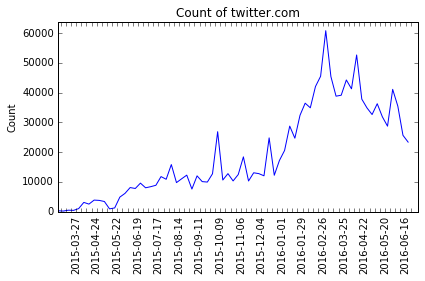

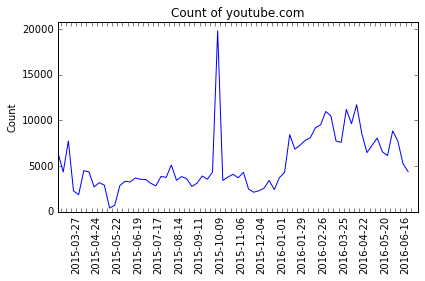

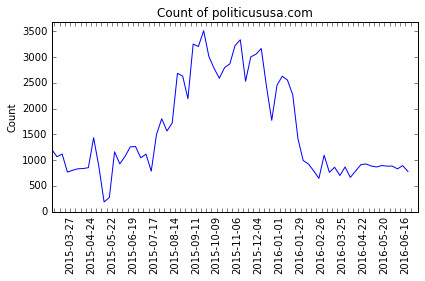

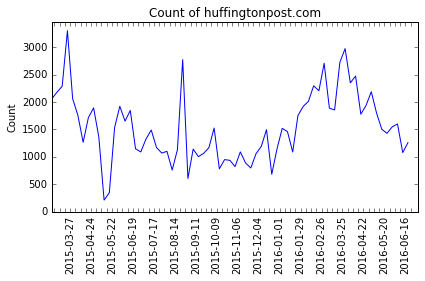

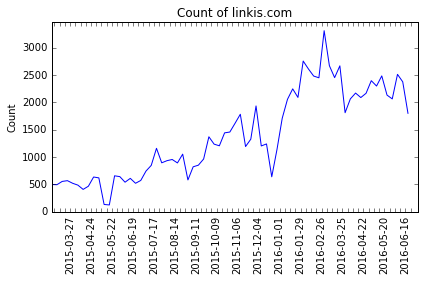

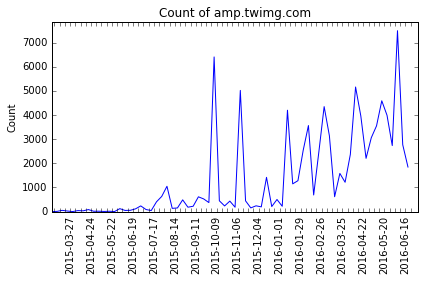

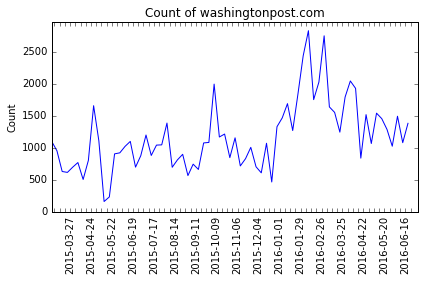

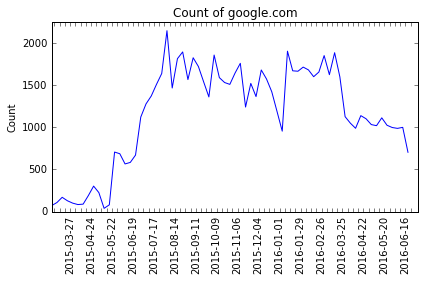

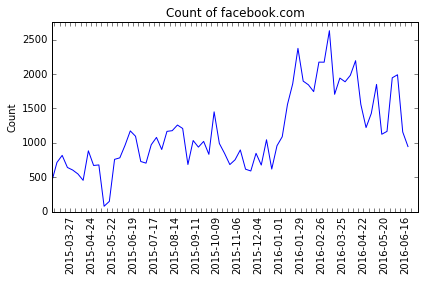

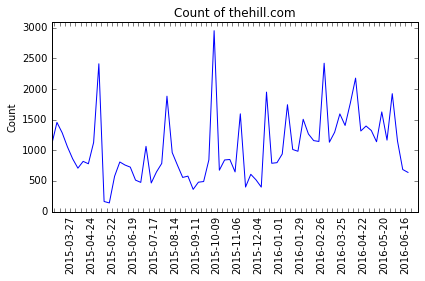

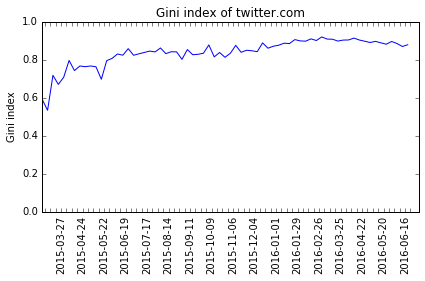

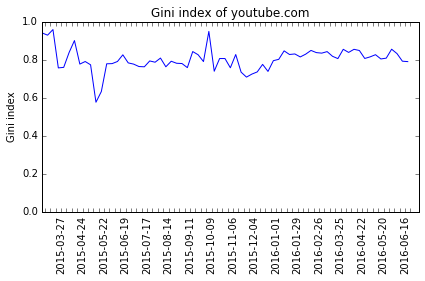

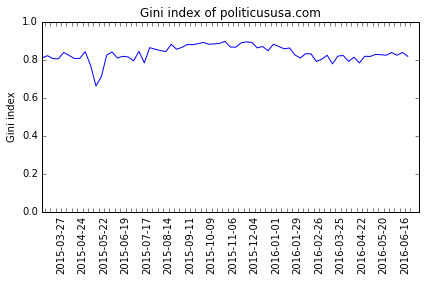

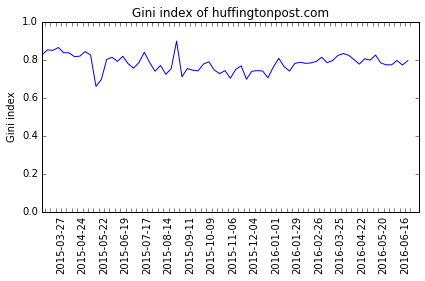

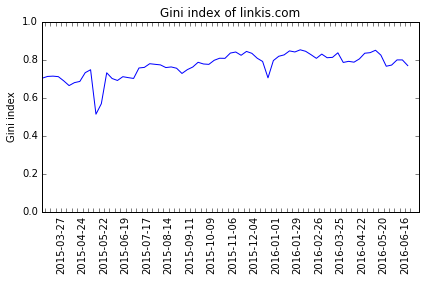

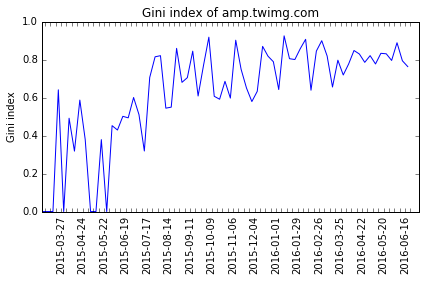

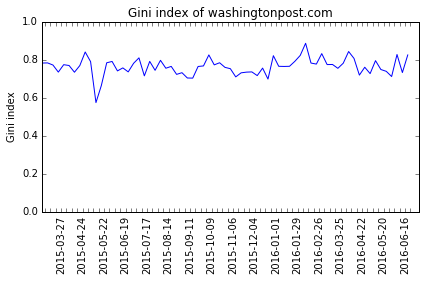

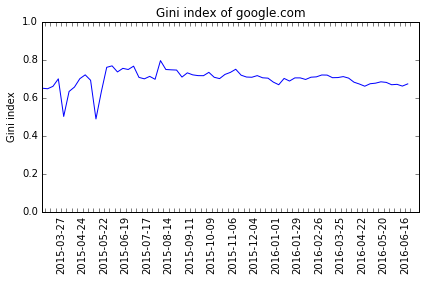

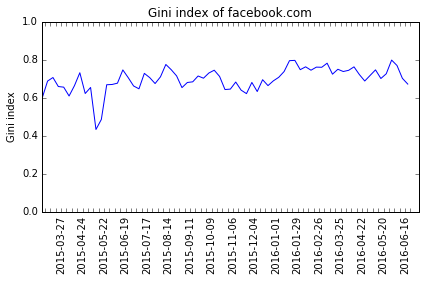

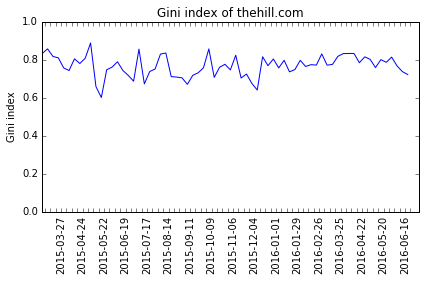

In [6]:
#silly thing to help figure labeling later
date_labels = []
counter = 1
for date in date_list:
    if counter % 4 == 0:
        date_labels.append(date)
    else:
        date_labels.append('')
    counter += 1 
        
        

#top_urls_freq 

for url in top_urls:
    single_url_freqs = top_urls_freq[url]
    urlString = url.replace('.', ',') #to avoid weird things when saving

    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 

    ax.plot(range(numDates), single_url_freqs)
    ax.axis([0, numDates + 1, 0, 1.05*max(single_url_freqs)]) #[min x, max x, min y, max y]

    ax.set_xticks(np.array(range(numDates))+0.5) #put where the tick-marks
    ax.set_xticklabels(date_labels, fontsize = 10) #what to label the ticks
    #             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
    #             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('Count of ' + url,  fontsize = 12)
    #             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Count', fontsize = 10)  
    #             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('FullFreq' + output_name + urlString + '.png')    
    plt.show()
    plt.close()  






#top_urls_gini

for url in top_urls:
    single_url_gini = top_urls_gini[url]
    urlString = url.replace('.', ',') #to avoid weird things when saving    

    PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
    ax = ax_Array #there's aren't any subplots so 

    ax.plot(range(numDates), single_url_gini)
    ax.axis([0, numDates + 1, 0, 1]) #[min x, max x, min y, max y]

    ax.set_xticks(np.array(range(numDates))+0.5) #put where the tick-marks
    ax.set_xticklabels(date_labels, fontsize = 10) #what to label the ticks
    #             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
    #             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=10)

    ax.set_title('Gini index of ' + url,  fontsize = 12)
    #             ax.set_xlabel('url', fontsize = 10)  
    ax.set_ylabel('Gini index', fontsize = 10)  
    #             ax.legend(loc = 1, fontsize = 10)    

    plt.tight_layout()
    PlotOut.savefig('FullGini' + output_name + urlString + '.png')    
    plt.show()
    plt.close()  


In [13]:
hashtags_co_occur = {}

for tweet in all_tweets: # going across all tweets
    for tag1 in tweet:     
        if tag1 in Ads_tags_list: #checking if any of the tags are ad-tags
            for tag2 in tweet:   # if one of the tags _was_ an add-tag, we go back and add all the tags on this tweet
                if tag2 not in Ads_tags_list: # we exclude all ad-tags themselves
                    if tag2 in hashtags_co_occur.keys(): # adding in the tags that appear next to the add
                          hashtags_co_occur[tag2] += 1
                    else: 
                          hashtags_co_occur[tag2] = 1

#This _should_ return a dictionary where the keys are tags that appear next to ad-tags, and the values are the number of times they appear.  This might have weird implications if multiple ad-tags appear in the same tweet, but it isn't clear to me how you'd want to handle that.  If you want it in the list format, then you just need 

list_co_occur = hashtags_co_occur.items()

print hashtags_co_occur.keys()

['enjoy', 'blind', 'amas', 'kindhuwelijken', 'money', 'martesintratable', 'givetwitteraslogan', 'dhdl', 'demdebate', 'lol', 'fail', 'gocubsgo', 'toppop', 'asambleaairen', 'turisl', 'brazil', 'untiebisunti', 'forex', 'foracunha', 'makemoney', 'contactoconmaduronro42', 'itanor', 'nicolasbelegidos', 'kindbruidjes', 'nazajavielegidos', 'seanobrien', 'bfc630nz', 'nedcze', 'debatewithbernie', 'frasesqueasustan', 'compilation', 'topicswww', 'iheartdemilovato', 'partychilensisftlaroja', 'worse', 'binary', 'trndnl', 'savetheboysfrombibi', 'canadiansuperheroes', 'addcamerondallasonsnapchat', 'dtv', 'euro2016', 'foracunha18', 'cubs', 'wtf', 'hiphopawards', 'day', 'yehdiwalipremwali', 'nobraday', 'yacholecontusquejas', 'holland', 'jenniferlawrence', 'oranje', 'iphone6s', 'unabendicion', 'bethiphopawards', 'nuevaconstitucion', 'thankyoutakethat', 'maischberger', 'tt']


In [14]:
print hashtags_co_occur

{'enjoy': 3, 'blind': 1, 'amas': 12315, 'kindhuwelijken': 1, 'money': 1, 'martesintratable': 167, 'givetwitteraslogan': 8812, 'dhdl': 744, 'demdebate': 18577, 'lol': 3, 'fail': 3, 'gocubsgo': 1, 'toppop': 321, 'asambleaairen': 3, 'turisl': 540, 'brazil': 1, 'untiebisunti': 1, 'forex': 1, 'foracunha': 12291, 'makemoney': 1, 'contactoconmaduronro42': 325, 'itanor': 204, 'nicolasbelegidos': 265, 'kindbruidjes': 1, 'nazajavielegidos': 167, 'seanobrien': 1428, 'bfc630nz': 1, 'nedcze': 205, 'debatewithbernie': 1, 'frasesqueasustan': 323, 'compilation': 3, 'topicswww': 1, 'iheartdemilovato': 3, 'partychilensisftlaroja': 2541, 'worse': 3, 'binary': 1, 'trndnl': 3, 'savetheboysfrombibi': 204, 'canadiansuperheroes': 883, 'addcamerondallasonsnapchat': 542, 'dtv': 1, 'euro2016': 1, 'foracunha18': 18, 'cubs': 520, 'wtf': 3, 'hiphopawards': 1, 'day': 3, 'yehdiwalipremwali': 1, 'nobraday': 3, 'yacholecontusquejas': 323, 'holland': 3, 'jenniferlawrence': 3, 'oranje': 540, 'iphone6s': 1, 'unabendicion'

In [31]:
#Url diversity 

# need to get for each hashtag the diversity of the different urls 


Url_Gini_List = []

    #now plotting Gini Index for each of the top twenty
for hashtag in top_twenty_hashtags:

        single_hashtag = total_hashtag_count_dictionary[hashtag] #dictionary of {tag:#} ((((NEED TO FIX THIS))))
        Url_Gini = getUrlGini(single_hashtag)
#                 tags_list = single_url_tags.keys() #list of [tag]
#                 #I _think_ this should be equivalent to single_
#                 tags_freq_list = [single_url_tags[tag] for tag in tags_list]


#                 denominator = 2*len(tags_list) * sum(tags_freq_list)
#                 numerator = 0
#                 for freq1 in tags_freq_list:
#                     for freq2 in tags_freq_list:
#                         numerator += abs(freq1 - freq2)

#                 Gini = float(numerator)/denominator
        Url_Gini_List.append(Url_Gini)


print Url_Gini_List

    #DARK PYPLOT MAGIC OOOOOOHHHHHH            
PlotOut, ax_Array = plt.subplots(nrows = 1, ncols = 1)#, figsize = (9,6))    
ax = ax_Array #there's aren't any subplots so 


ax.bar(range(20), Url_Gini_List)
ax.axis([0, 21, 0, 1.0]) #[min x, max x, min y, max y]


ax.set_xticks(np.array(range(20))+0.5) #put where the tick-marks
ax.set_xticklabels(top_twenty_hashtags, fontsize = 10) #what to label the ticks
#             ax.set_yticks([0.0, 0.15, 0.3, 0.45, 0.6])
#             ax.set_yticklabels([0, 0.15, 0.30, 0.45, 0.6], fontsize = 10)  
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=10)

ax.set_title('week starting in ' + date,  fontsize = 12)
#             ax.set_xlabel('url', fontsize = 10)  
ax.set_ylabel('Url Gini', fontsize = 10)  
#             ax.legend(loc = 1, fontsize = 10)    

plt.tight_layout()
PlotOut.savefig('Url_Gini' + output_name + date + '.png')    
plt.show()
plt.close()   
    

AttributeError: 'int' object has no attribute 'keys'

In [10]:
sorted_data_df = data_df.sort_values(by="URL Frequency", ascending=False)
sd = sorted_data_df.head(20)
sd


NameError: name 'data_df' is not defined

### Getting the row(s) where columns match a given condition

**Condition** is `column == some_value`. This is calculated from a boolean series

To then get the dataframe row(s) we do: `Dataframe[ boolean series ]`

In [7]:
thehill = sorted_data_df[ sorted_data_df["URL"] == "http://thehill.com/" ]
#   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ -> boolean series giving all rows where URL column is TheHill

thehill

NameError: name 'sorted_data_df' is not defined

In [ ]:
thehill_series = thehill["Associated Hashtags"].iloc[0]
#                                              ^^^^^ with iloc you can get rows using 0-indexed entries

thehill_series[thehill_series > 10].plot(kind="bar", figsize=(15, 8))

plt.xticks(rotation=70)

In [ ]:
#to read Currently undone, but needed for graphing
#df=pd.read.csv("File Name.csv",index_col=0)
#df

data_df.to_csv("URL_Hashtag_link_.csv")

In [ ]:
#produce a graph
# pd.DataFrame(data_df(INSERT URL CHOICE HERE), index=ts.index - this should be the hashtags, columns = Date)
#DataFrame.plot.bar(stacked=True)

#data_df.plot()

test_df=pd.read_csv("URL_Hashtag_link_.csv",index_col=0)
test_df.head()

In [ ]:
#plt.figure(kind='bar'); 
sd.plot.bar(); 
